<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - ATOM</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ATOM.csv')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1822,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1823,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1824,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   ATOM-USD_ADJCLOSE  1139 non-null   float64
 2   ATOM-USD_CLOSE     1139 non-null   float64
 3   ATOM-USD_HIGH      1139 non-null   float64
 4   ATOM-USD_LOW       1139 non-null   float64
 5   ATOM-USD_OPEN      1139 non-null   float64
 6   ATOM-USD_VOLUME    1139 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ATOM-USD_ADJCLOSE,687
ATOM-USD_CLOSE,687
ATOM-USD_HIGH,687
ATOM-USD_LOW,687
ATOM-USD_OPEN,687
ATOM-USD_VOLUME,687


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATOM-USD_ADJCLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_CLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_HIGH,1139.0,1.277825e+01,1.185602e+01,1.813534e+00,3.964141e+00,5.646225e+00,2.236199e+01,4.469553e+01
ATOM-USD_LOW,1139.0,1.146925e+01,1.060174e+01,1.130963e+00,3.652236e+00,5.195447e+00,1.963870e+01,3.922326e+01
ATOM-USD_OPEN,1139.0,1.213242e+01,1.125074e+01,1.652300e+00,3.792107e+00,5.413434e+00,2.125093e+01,4.427964e+01
ATOM-USD_VOLUME,1139.0,4.468545e+08,5.348951e+08,2.567201e+06,1.373081e+08,2.356630e+08,5.647138e+08,4.260700e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
56,2017-06-21,NaN,NaN,NaN,NaN,NaN,NaN
1731,2022-01-21,34.417976,34.417976,40.768547,32.482494,39.072628,2.954829e+09
760,2019-05-26,4.508584,4.508584,4.545763,4.285959,4.415332,4.934963e+07
1532,2021-07-06,13.159371,13.159371,14.020420,12.823983,13.558099,2.537822e+08
949,2019-12-01,3.807352,3.807352,3.929497,3.657669,3.919437,1.758837e+08
1260,2020-10-07,4.886457,4.886457,4.932540,4.572615,4.734022,2.429006e+08
1324,2020-12-10,4.659645,4.659645,4.814877,4.652735,4.805373,1.456231e+08
45,2017-06-10,NaN,NaN,NaN,NaN,NaN,NaN
1065,2020-03-26,2.170453,2.170453,2.170453,2.076325,2.079706,1.169761e+08
757,2019-05-23,4.335001,4.335001,4.372058,4.132530,4.352471,5.013906e+07


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
682,2019-03-09,NaN,NaN,NaN,NaN,NaN,NaN
683,2019-03-10,NaN,NaN,NaN,NaN,NaN,NaN
684,2019-03-11,NaN,NaN,NaN,NaN,NaN,NaN
685,2019-03-12,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0,1.331878,4.500817
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0,11.608961,19.942286
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0,1.680794,24.065681
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0,54.045020,55.617737
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0,5.520165,8.320629


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

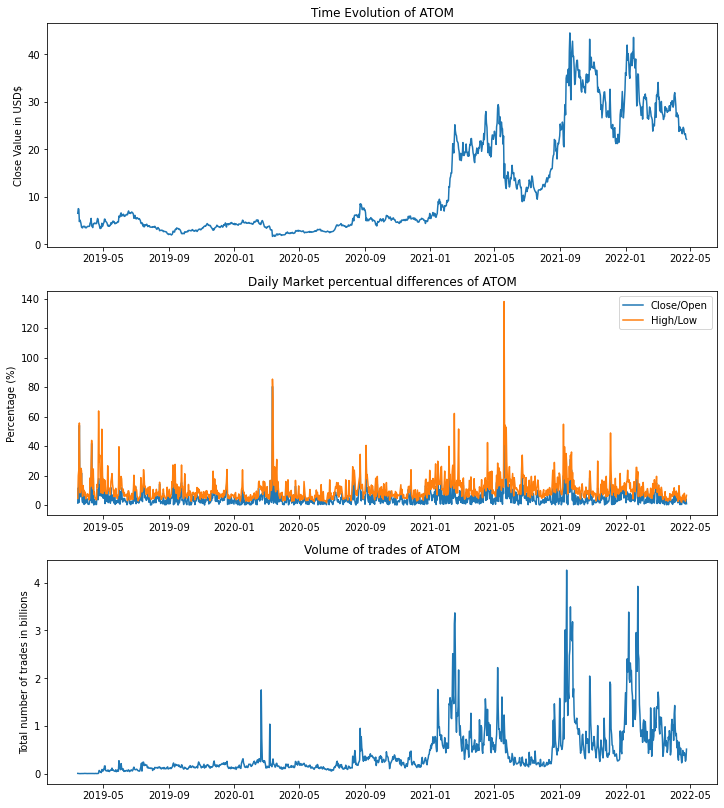

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2020-01-01']
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
293,2020-01-01,4.380158,4.380158,4.467644,4.204366,4.216717,107994513.0,3.731399,6.262014
294,2020-01-02,4.091817,4.091817,4.381319,4.077720,4.379122,111325337.0,7.021450,7.445309
295,2020-01-03,4.247897,4.247897,4.356596,4.015515,4.105868,138617691.0,3.343520,8.494082
296,2020-01-04,4.286356,4.286356,4.385617,4.233593,4.245741,90718305.0,0.947543,3.590893
297,2020-01-05,4.231877,4.231877,4.395146,4.215782,4.284225,115399788.0,1.236996,4.254578
...,...,...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0,4.226664,7.991446
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0,0.934967,3.869160
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0,0.782125,2.572120
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0,4.162394,4.231481


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(30, df)
windowed_df['Date'] = df.iloc[30:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue_11daysBefore,closeValue_12daysBefore,closeValue_13daysBefore,closeValue_14daysBefore,closeValue_15daysBefore,closeValue_16daysBefore,closeValue_17daysBefore,closeValue_18daysBefore,closeValue_19daysBefore,closeValue_20daysBefore,closeValue_21daysBefore,closeValue_22daysBefore,closeValue_23daysBefore,closeValue_24daysBefore,closeValue_25daysBefore,closeValue_26daysBefore,closeValue_27daysBefore,closeValue_28daysBefore,closeValue_29daysBefore,closeValue_30daysBefore,closeValue,Date
0,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.091817,4.380158,4.389513,2020-01-31
1,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.091817,4.376357,2020-02-01
2,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.406765,2020-02-02
3,4.406765,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.260727,2020-02-03
4,4.260727,4.406765,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.216974,2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,28.210022,28.044510,23.305845,2022-04-21
812,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,28.210022,23.089931,2022-04-22
813,23.089931,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,23.271534,2022-04-23
814,23.271534,23.089931,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,22.330360,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((816,), (816, 30, 1), (816,))

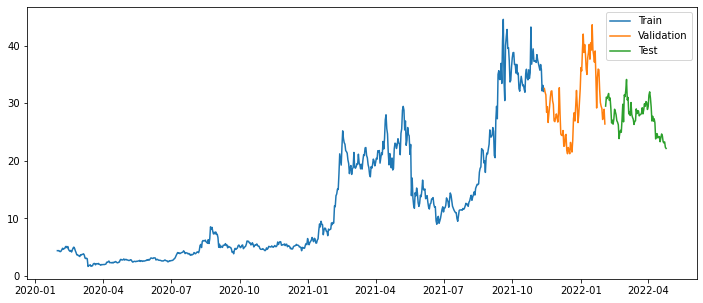

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((30, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
66/66 - 2s - loss: 102.4162 - mean_absolute_error: 7.3730 - val_loss: 188.9826 - val_mean_absolute_error: 12.6458 - 2s/epoch - 27ms/step
Epoch 2/50
66/66 - 0s - loss: 122.3777 - mean_absolute_error: 8.6291 - val_loss: 159.3589 - val_mean_absolute_error: 11.2311 - 384ms/epoch - 6ms/step
Epoch 3/50
66/66 - 0s - loss: 47.4820 - mean_absolute_error: 5.1786 - val_loss: 61.8309 - val_mean_absolute_error: 6.2652 - 381ms/epoch - 6ms/step
Epoch 4/50
66/66 - 0s - loss: 48.2383 - mean_absolute_error: 4.9003 - val_loss: 95.6478 - val_mean_absolute_error: 7.9686 - 383ms/epoch - 6ms/step
Epoch 5/50
66/66 - 0s - loss: 37.0975 - mean_absolute_error: 4.1253 - val_loss: 75.0272 - val_mean_absolute_error: 6.8352 - 381ms/epoch - 6ms/step
Epoch 6/50
66/66 - 0s - loss: 32.2400 - mean_absolute_error: 3.8011 - val_loss: 58.0260 - val_mean_absolute_error: 5.8994 - 385ms/epoch - 6ms/step
Epoch 7/50
66/66 - 0s - loss: 35.5487 - mean_abs

Epoch 6/50
66/66 - 0s - loss: 106.6111 - mean_absolute_error: 7.0681 - val_loss: 46.6863 - val_mean_absolute_error: 5.9979 - 382ms/epoch - 6ms/step
Epoch 7/50
66/66 - 0s - loss: 112.4052 - mean_absolute_error: 7.7786 - val_loss: 142.4886 - val_mean_absolute_error: 10.3029 - 383ms/epoch - 6ms/step
Epoch 8/50
66/66 - 0s - loss: 75.4790 - mean_absolute_error: 5.4359 - val_loss: 195.6234 - val_mean_absolute_error: 12.6740 - 380ms/epoch - 6ms/step
Epoch 9/50
66/66 - 0s - loss: 60.9368 - mean_absolute_error: 4.8304 - val_loss: 150.0660 - val_mean_absolute_error: 10.6875 - 386ms/epoch - 6ms/step
Epoch 10/50
66/66 - 0s - loss: 64.1070 - mean_absolute_error: 5.0031 - val_loss: 155.4599 - val_mean_absolute_error: 10.9220 - 376ms/epoch - 6ms/step
Epoch 11/50
66/66 - 0s - loss: 61.2292 - mean_absolute_error: 4.7967 - val_loss: 142.4980 - val_mean_absolute_error: 10.3118 - 380ms/epoch - 6ms/step
Epoch 12/50
66/66 - 0s - loss: 60.3442 - mean_absolute_error: 4.6387 - val_loss: 138.6304 - val_mean_abs

Epoch 11/50
66/66 - 0s - loss: 150.3299 - mean_absolute_error: 7.8664 - val_loss: 644.4791 - val_mean_absolute_error: 24.7292 - 385ms/epoch - 6ms/step
Epoch 12/50
66/66 - 0s - loss: 141.3399 - mean_absolute_error: 7.8263 - val_loss: 609.5739 - val_mean_absolute_error: 24.0130 - 380ms/epoch - 6ms/step
Epoch 13/50
66/66 - 0s - loss: 134.2642 - mean_absolute_error: 7.8584 - val_loss: 579.1621 - val_mean_absolute_error: 23.3712 - 384ms/epoch - 6ms/step
Epoch 14/50
66/66 - 0s - loss: 128.7099 - mean_absolute_error: 7.9036 - val_loss: 552.6072 - val_mean_absolute_error: 22.7960 - 383ms/epoch - 6ms/step
Epoch 15/50
66/66 - 0s - loss: 124.3671 - mean_absolute_error: 7.9551 - val_loss: 529.3867 - val_mean_absolute_error: 22.2809 - 389ms/epoch - 6ms/step
Epoch 16/50
66/66 - 0s - loss: 120.9885 - mean_absolute_error: 8.0125 - val_loss: 509.0638 - val_mean_absolute_error: 21.8201 - 383ms/epoch - 6ms/step
Epoch 17/50
66/66 - 0s - loss: 118.3757 - mean_absolute_error: 8.0737 - val_loss: 491.2675 - v

Epoch 15/50
66/66 - 0s - loss: 131.6692 - mean_absolute_error: 9.6494 - val_loss: 323.1105 - val_mean_absolute_error: 17.0342 - 398ms/epoch - 6ms/step
Epoch 16/50
66/66 - 0s - loss: 131.1014 - mean_absolute_error: 9.6272 - val_loss: 324.8152 - val_mean_absolute_error: 17.0841 - 432ms/epoch - 7ms/step
Epoch 17/50
66/66 - 0s - loss: 130.5762 - mean_absolute_error: 9.6059 - val_loss: 326.2231 - val_mean_absolute_error: 17.1253 - 467ms/epoch - 7ms/step
Epoch 18/50
66/66 - 0s - loss: 130.1234 - mean_absolute_error: 9.5877 - val_loss: 327.5112 - val_mean_absolute_error: 17.1629 - 442ms/epoch - 7ms/step
Epoch 19/50
66/66 - 1s - loss: 129.7021 - mean_absolute_error: 9.5708 - val_loss: 328.7106 - val_mean_absolute_error: 17.1978 - 523ms/epoch - 8ms/step
Epoch 20/50
66/66 - 0s - loss: 129.3040 - mean_absolute_error: 9.5547 - val_loss: 329.8329 - val_mean_absolute_error: 17.2304 - 460ms/epoch - 7ms/step
Epoch 21/50
66/66 - 0s - loss: 128.9250 - mean_absolute_error: 9.5394 - val_loss: 330.8853 - v

Epoch 19/50
66/66 - 0s - loss: 112.0400 - mean_absolute_error: 8.7247 - val_loss: 373.5866 - val_mean_absolute_error: 18.4564 - 496ms/epoch - 8ms/step
Epoch 20/50
66/66 - 0s - loss: 112.1475 - mean_absolute_error: 8.7450 - val_loss: 371.2648 - val_mean_absolute_error: 18.3934 - 435ms/epoch - 7ms/step
Epoch 21/50
66/66 - 0s - loss: 112.2393 - mean_absolute_error: 8.7610 - val_loss: 369.4901 - val_mean_absolute_error: 18.3451 - 453ms/epoch - 7ms/step
Epoch 22/50
66/66 - 1s - loss: 112.3158 - mean_absolute_error: 8.7735 - val_loss: 368.1343 - val_mean_absolute_error: 18.3081 - 552ms/epoch - 8ms/step
Epoch 23/50
66/66 - 0s - loss: 112.3786 - mean_absolute_error: 8.7833 - val_loss: 367.0989 - val_mean_absolute_error: 18.2798 - 463ms/epoch - 7ms/step
Epoch 24/50
66/66 - 0s - loss: 112.4296 - mean_absolute_error: 8.7908 - val_loss: 366.3084 - val_mean_absolute_error: 18.2582 - 438ms/epoch - 7ms/step
Epoch 25/50
66/66 - 0s - loss: 112.4708 - mean_absolute_error: 8.7966 - val_loss: 365.7049 - v

Epoch 18/50
66/66 - 0s - loss: 129.9497 - mean_absolute_error: 9.5604 - val_loss: 330.9051 - val_mean_absolute_error: 17.2614 - 398ms/epoch - 6ms/step
Epoch 19/50
66/66 - 0s - loss: 129.6416 - mean_absolute_error: 9.5463 - val_loss: 332.1410 - val_mean_absolute_error: 17.2972 - 401ms/epoch - 6ms/step
Epoch 20/50
66/66 - 0s - loss: 129.3261 - mean_absolute_error: 9.5318 - val_loss: 333.3905 - val_mean_absolute_error: 17.3333 - 402ms/epoch - 6ms/step
Epoch 21/50
66/66 - 0s - loss: 129.0036 - mean_absolute_error: 9.5169 - val_loss: 334.6521 - val_mean_absolute_error: 17.3696 - 404ms/epoch - 6ms/step
Epoch 22/50
66/66 - 0s - loss: 128.6748 - mean_absolute_error: 9.5017 - val_loss: 335.9244 - val_mean_absolute_error: 17.4062 - 402ms/epoch - 6ms/step
Epoch 23/50
66/66 - 0s - loss: 128.3399 - mean_absolute_error: 9.4861 - val_loss: 337.2069 - val_mean_absolute_error: 17.4430 - 400ms/epoch - 6ms/step
Epoch 24/50
66/66 - 0s - loss: 127.9989 - mean_absolute_error: 9.4703 - val_loss: 338.4991 - v

Epoch 17/50
66/66 - 0s - loss: 122.3605 - mean_absolute_error: 9.1634 - val_loss: 365.2459 - val_mean_absolute_error: 18.2290 - 387ms/epoch - 6ms/step
Epoch 18/50
66/66 - 0s - loss: 121.3389 - mean_absolute_error: 9.1168 - val_loss: 367.6445 - val_mean_absolute_error: 18.2947 - 390ms/epoch - 6ms/step
Epoch 19/50
66/66 - 0s - loss: 120.3208 - mean_absolute_error: 9.0706 - val_loss: 369.7669 - val_mean_absolute_error: 18.3526 - 395ms/epoch - 6ms/step
Epoch 20/50
66/66 - 0s - loss: 119.3131 - mean_absolute_error: 9.0252 - val_loss: 371.5443 - val_mean_absolute_error: 18.4010 - 392ms/epoch - 6ms/step
Epoch 21/50
66/66 - 0s - loss: 118.3270 - mean_absolute_error: 8.9817 - val_loss: 372.8960 - val_mean_absolute_error: 18.4377 - 387ms/epoch - 6ms/step
Epoch 22/50
66/66 - 0s - loss: 117.3788 - mean_absolute_error: 8.9416 - val_loss: 373.7361 - val_mean_absolute_error: 18.4605 - 389ms/epoch - 6ms/step
Epoch 23/50
66/66 - 0s - loss: 116.4908 - mean_absolute_error: 8.9057 - val_loss: 373.9872 - v

Epoch 21/50
66/66 - 0s - loss: 114.8189 - mean_absolute_error: 8.9313 - val_loss: 358.2876 - val_mean_absolute_error: 18.0372 - 402ms/epoch - 6ms/step
Epoch 22/50
66/66 - 0s - loss: 114.8244 - mean_absolute_error: 8.9318 - val_loss: 358.2566 - val_mean_absolute_error: 18.0363 - 396ms/epoch - 6ms/step
Epoch 23/50
66/66 - 0s - loss: 114.8282 - mean_absolute_error: 8.9321 - val_loss: 358.2379 - val_mean_absolute_error: 18.0358 - 395ms/epoch - 6ms/step
Epoch 24/50
66/66 - 0s - loss: 114.8311 - mean_absolute_error: 8.9323 - val_loss: 358.2266 - val_mean_absolute_error: 18.0355 - 394ms/epoch - 6ms/step
Epoch 25/50
66/66 - 0s - loss: 114.8334 - mean_absolute_error: 8.9324 - val_loss: 358.2197 - val_mean_absolute_error: 18.0353 - 395ms/epoch - 6ms/step
Epoch 26/50
66/66 - 0s - loss: 114.8351 - mean_absolute_error: 8.9325 - val_loss: 358.2154 - val_mean_absolute_error: 18.0352 - 396ms/epoch - 6ms/step
Epoch 27/50
66/66 - 0s - loss: 114.8366 - mean_absolute_error: 8.9326 - val_loss: 358.2128 - v

Epoch 25/50
66/66 - 0s - loss: 115.4626 - mean_absolute_error: 8.9654 - val_loss: 356.5673 - val_mean_absolute_error: 17.9894 - 399ms/epoch - 6ms/step
Epoch 26/50
66/66 - 0s - loss: 115.4720 - mean_absolute_error: 8.9659 - val_loss: 356.5446 - val_mean_absolute_error: 17.9888 - 400ms/epoch - 6ms/step
Epoch 27/50
66/66 - 0s - loss: 115.4803 - mean_absolute_error: 8.9663 - val_loss: 356.5255 - val_mean_absolute_error: 17.9883 - 406ms/epoch - 6ms/step
Epoch 28/50
66/66 - 0s - loss: 115.4877 - mean_absolute_error: 8.9667 - val_loss: 356.5088 - val_mean_absolute_error: 17.9878 - 403ms/epoch - 6ms/step
Epoch 29/50
66/66 - 0s - loss: 115.4945 - mean_absolute_error: 8.9670 - val_loss: 356.4940 - val_mean_absolute_error: 17.9874 - 399ms/epoch - 6ms/step
Epoch 30/50
66/66 - 0s - loss: 115.5006 - mean_absolute_error: 8.9673 - val_loss: 356.4808 - val_mean_absolute_error: 17.9870 - 402ms/epoch - 6ms/step
Epoch 31/50
66/66 - 0s - loss: 115.5062 - mean_absolute_error: 8.9676 - val_loss: 356.4690 - v

Epoch 29/50
66/66 - 0s - loss: 116.2603 - mean_absolute_error: 9.0070 - val_loss: 354.4745 - val_mean_absolute_error: 17.9312 - 412ms/epoch - 6ms/step
Epoch 30/50
66/66 - 0s - loss: 116.2635 - mean_absolute_error: 9.0072 - val_loss: 354.4690 - val_mean_absolute_error: 17.9310 - 411ms/epoch - 6ms/step
Epoch 31/50
66/66 - 0s - loss: 116.2663 - mean_absolute_error: 9.0073 - val_loss: 354.4641 - val_mean_absolute_error: 17.9309 - 414ms/epoch - 6ms/step
Epoch 32/50
66/66 - 0s - loss: 116.2689 - mean_absolute_error: 9.0074 - val_loss: 354.4596 - val_mean_absolute_error: 17.9307 - 417ms/epoch - 6ms/step
Epoch 33/50
66/66 - 0s - loss: 116.2713 - mean_absolute_error: 9.0075 - val_loss: 354.4554 - val_mean_absolute_error: 17.9306 - 415ms/epoch - 6ms/step
Epoch 34/50
66/66 - 0s - loss: 116.2735 - mean_absolute_error: 9.0076 - val_loss: 354.4515 - val_mean_absolute_error: 17.9305 - 417ms/epoch - 6ms/step
Epoch 35/50
66/66 - 0s - loss: 116.2755 - mean_absolute_error: 9.0077 - val_loss: 354.4480 - v

Epoch 34/100
66/66 - 0s - loss: 3.5219 - mean_absolute_error: 1.2108 - val_loss: 25.2904 - val_mean_absolute_error: 4.1003 - 410ms/epoch - 6ms/step
Epoch 35/100
66/66 - 0s - loss: 3.2062 - mean_absolute_error: 1.1897 - val_loss: 24.7522 - val_mean_absolute_error: 4.0171 - 409ms/epoch - 6ms/step
Epoch 36/100
66/66 - 0s - loss: 3.0630 - mean_absolute_error: 1.0817 - val_loss: 24.6418 - val_mean_absolute_error: 3.9828 - 412ms/epoch - 6ms/step
Epoch 37/100
66/66 - 0s - loss: 3.2620 - mean_absolute_error: 1.1356 - val_loss: 24.3898 - val_mean_absolute_error: 3.9506 - 406ms/epoch - 6ms/step
Epoch 38/100
66/66 - 0s - loss: 3.9067 - mean_absolute_error: 1.2054 - val_loss: 25.9212 - val_mean_absolute_error: 4.0855 - 408ms/epoch - 6ms/step
Epoch 39/100
66/66 - 0s - loss: 5.0261 - mean_absolute_error: 1.3551 - val_loss: 24.8804 - val_mean_absolute_error: 4.0338 - 413ms/epoch - 6ms/step
Epoch 40/100
66/66 - 0s - loss: 4.9795 - mean_absolute_error: 1.3346 - val_loss: 29.1529 - val_mean_absolute_err

Epoch 90/100
66/66 - 0s - loss: 4.1555 - mean_absolute_error: 1.2986 - val_loss: 18.4416 - val_mean_absolute_error: 3.5291 - 406ms/epoch - 6ms/step
Epoch 91/100
66/66 - 0s - loss: 4.5600 - mean_absolute_error: 1.2529 - val_loss: 20.6296 - val_mean_absolute_error: 3.5627 - 405ms/epoch - 6ms/step
Epoch 92/100
66/66 - 0s - loss: 4.4373 - mean_absolute_error: 1.4148 - val_loss: 14.7632 - val_mean_absolute_error: 3.2076 - 407ms/epoch - 6ms/step
Epoch 93/100
66/66 - 0s - loss: 4.4562 - mean_absolute_error: 1.3044 - val_loss: 18.6238 - val_mean_absolute_error: 3.4808 - 406ms/epoch - 6ms/step
Epoch 94/100
66/66 - 0s - loss: 4.1501 - mean_absolute_error: 1.2275 - val_loss: 14.9379 - val_mean_absolute_error: 3.3036 - 406ms/epoch - 6ms/step
Epoch 95/100
66/66 - 0s - loss: 3.4003 - mean_absolute_error: 1.0987 - val_loss: 16.5554 - val_mean_absolute_error: 3.3390 - 409ms/epoch - 6ms/step
Epoch 96/100
66/66 - 0s - loss: 3.4874 - mean_absolute_error: 1.1148 - val_loss: 14.1899 - val_mean_absolute_err

Epoch 45/100
66/66 - 0s - loss: 25.9699 - mean_absolute_error: 3.6042 - val_loss: 51.2535 - val_mean_absolute_error: 5.9340 - 414ms/epoch - 6ms/step
Epoch 46/100
66/66 - 0s - loss: 24.6373 - mean_absolute_error: 3.4853 - val_loss: 52.9676 - val_mean_absolute_error: 6.0426 - 413ms/epoch - 6ms/step
Epoch 47/100
66/66 - 0s - loss: 23.0686 - mean_absolute_error: 3.3822 - val_loss: 57.1348 - val_mean_absolute_error: 6.5569 - 421ms/epoch - 6ms/step
Epoch 48/100
66/66 - 0s - loss: 22.9988 - mean_absolute_error: 3.3644 - val_loss: 55.8160 - val_mean_absolute_error: 6.3678 - 420ms/epoch - 6ms/step
Epoch 49/100
66/66 - 0s - loss: 21.9905 - mean_absolute_error: 3.3110 - val_loss: 59.8629 - val_mean_absolute_error: 6.7332 - 430ms/epoch - 7ms/step
Epoch 50/100
66/66 - 0s - loss: 21.8913 - mean_absolute_error: 3.2881 - val_loss: 58.5254 - val_mean_absolute_error: 6.6305 - 422ms/epoch - 6ms/step
Epoch 51/100
66/66 - 0s - loss: 21.3684 - mean_absolute_error: 3.2628 - val_loss: 61.8249 - val_mean_absol

Epoch 100/100
66/66 - 0s - loss: 31.2478 - mean_absolute_error: 4.0683 - val_loss: 37.3415 - val_mean_absolute_error: 4.8087 - 414ms/epoch - 6ms/step
MSE=14.393
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.023000000000000003
Epoch 1/100
66/66 - 2s - loss: 64.4544 - mean_absolute_error: 4.6720 - val_loss: 224.9842 - val_mean_absolute_error: 13.8770 - 2s/epoch - 26ms/step
Epoch 2/100
66/66 - 0s - loss: 188.3675 - mean_absolute_error: 9.0252 - val_loss: 49.8360 - val_mean_absolute_error: 5.5758 - 393ms/epoch - 6ms/step
Epoch 3/100
66/66 - 0s - loss: 149.5145 - mean_absolute_error: 8.7880 - val_loss: 188.7246 - val_mean_absolute_error: 12.4809 - 391ms/epoch - 6ms/step
Epoch 4/100
66/66 - 0s - loss: 135.7771 - mean_absolute_error: 8.4299 - val_loss: 223.2710 - val_mean_absolute_error: 13.7922 - 390ms/epoch - 6ms/step
Epoch 5/100
66/66 - 0s - loss: 99.6912 - mean_absolute_error: 6.9723 - val_loss: 499.1329 - val_mean_absolute_error: 21.6325 - 393ms/epoch - 6ms/step
Epoch 6/

Epoch 54/100
66/66 - 0s - loss: 120.0709 - mean_absolute_error: 9.1494 - val_loss: 353.1943 - val_mean_absolute_error: 17.8954 - 389ms/epoch - 6ms/step
Epoch 55/100
66/66 - 0s - loss: 119.9793 - mean_absolute_error: 9.1453 - val_loss: 353.3469 - val_mean_absolute_error: 17.8997 - 388ms/epoch - 6ms/step
Epoch 56/100
66/66 - 0s - loss: 119.8911 - mean_absolute_error: 9.1415 - val_loss: 353.4865 - val_mean_absolute_error: 17.9036 - 398ms/epoch - 6ms/step
Epoch 57/100
66/66 - 0s - loss: 119.8070 - mean_absolute_error: 9.1379 - val_loss: 353.6134 - val_mean_absolute_error: 17.9071 - 396ms/epoch - 6ms/step
Epoch 58/100
66/66 - 0s - loss: 119.7273 - mean_absolute_error: 9.1344 - val_loss: 353.7281 - val_mean_absolute_error: 17.9103 - 394ms/epoch - 6ms/step
Epoch 59/100
66/66 - 0s - loss: 119.6523 - mean_absolute_error: 9.1312 - val_loss: 353.8315 - val_mean_absolute_error: 17.9132 - 392ms/epoch - 6ms/step
Epoch 60/100
66/66 - 0s - loss: 119.5823 - mean_absolute_error: 9.1283 - val_loss: 353.9

Epoch 8/100
66/66 - 0s - loss: 130.5062 - mean_absolute_error: 9.5080 - val_loss: 319.0867 - val_mean_absolute_error: 16.9156 - 412ms/epoch - 6ms/step
Epoch 9/100
66/66 - 0s - loss: 134.0964 - mean_absolute_error: 9.7055 - val_loss: 323.3907 - val_mean_absolute_error: 17.0424 - 413ms/epoch - 6ms/step
Epoch 10/100
66/66 - 0s - loss: 132.6274 - mean_absolute_error: 9.6542 - val_loss: 328.8477 - val_mean_absolute_error: 17.2017 - 411ms/epoch - 6ms/step
Epoch 11/100
66/66 - 0s - loss: 131.1109 - mean_absolute_error: 9.5885 - val_loss: 330.7161 - val_mean_absolute_error: 17.2560 - 419ms/epoch - 6ms/step
Epoch 12/100
66/66 - 0s - loss: 130.4347 - mean_absolute_error: 9.5635 - val_loss: 332.4328 - val_mean_absolute_error: 17.3056 - 421ms/epoch - 6ms/step
Epoch 13/100
66/66 - 0s - loss: 129.8075 - mean_absolute_error: 9.5398 - val_loss: 334.0976 - val_mean_absolute_error: 17.3537 - 423ms/epoch - 6ms/step
Epoch 14/100
66/66 - 0s - loss: 129.1990 - mean_absolute_error: 9.5166 - val_loss: 335.702

Epoch 62/100
66/66 - 0s - loss: 119.9782 - mean_absolute_error: 9.1209 - val_loss: 357.6499 - val_mean_absolute_error: 18.0195 - 420ms/epoch - 6ms/step
Epoch 63/100
66/66 - 0s - loss: 119.8761 - mean_absolute_error: 9.1154 - val_loss: 358.0016 - val_mean_absolute_error: 18.0292 - 416ms/epoch - 6ms/step
Epoch 64/100
66/66 - 0s - loss: 119.7730 - mean_absolute_error: 9.1099 - val_loss: 358.3568 - val_mean_absolute_error: 18.0391 - 419ms/epoch - 6ms/step
Epoch 65/100
66/66 - 0s - loss: 119.6688 - mean_absolute_error: 9.1043 - val_loss: 358.7152 - val_mean_absolute_error: 18.0490 - 419ms/epoch - 6ms/step
Epoch 66/100
66/66 - 0s - loss: 119.5635 - mean_absolute_error: 9.0986 - val_loss: 359.0772 - val_mean_absolute_error: 18.0591 - 417ms/epoch - 6ms/step
Epoch 67/100
66/66 - 0s - loss: 119.4569 - mean_absolute_error: 9.0928 - val_loss: 359.4428 - val_mean_absolute_error: 18.0692 - 424ms/epoch - 6ms/step
Epoch 68/100
66/66 - 0s - loss: 119.3491 - mean_absolute_error: 9.0870 - val_loss: 359.8

Epoch 16/100
66/66 - 0s - loss: 111.9103 - mean_absolute_error: 8.6870 - val_loss: 378.2065 - val_mean_absolute_error: 18.5811 - 429ms/epoch - 7ms/step
Epoch 17/100
66/66 - 0s - loss: 112.0377 - mean_absolute_error: 8.7166 - val_loss: 374.7022 - val_mean_absolute_error: 18.4866 - 423ms/epoch - 6ms/step
Epoch 18/100
66/66 - 0s - loss: 112.1528 - mean_absolute_error: 8.7395 - val_loss: 372.0440 - val_mean_absolute_error: 18.4146 - 428ms/epoch - 6ms/step
Epoch 19/100
66/66 - 0s - loss: 112.2514 - mean_absolute_error: 8.7575 - val_loss: 370.0280 - val_mean_absolute_error: 18.3597 - 423ms/epoch - 6ms/step
Epoch 20/100
66/66 - 0s - loss: 112.3333 - mean_absolute_error: 8.7714 - val_loss: 368.4995 - val_mean_absolute_error: 18.3181 - 423ms/epoch - 6ms/step
Epoch 21/100
66/66 - 0s - loss: 112.3999 - mean_absolute_error: 8.7822 - val_loss: 367.3406 - val_mean_absolute_error: 18.2864 - 427ms/epoch - 6ms/step
Epoch 22/100
66/66 - 0s - loss: 112.4534 - mean_absolute_error: 8.7905 - val_loss: 366.4

Epoch 70/100
66/66 - 0s - loss: 112.6854 - mean_absolute_error: 8.8191 - val_loss: 363.6567 - val_mean_absolute_error: 18.1854 - 420ms/epoch - 6ms/step
Epoch 71/100
66/66 - 0s - loss: 112.6855 - mean_absolute_error: 8.8191 - val_loss: 363.6565 - val_mean_absolute_error: 18.1854 - 423ms/epoch - 6ms/step
Epoch 72/100
66/66 - 0s - loss: 112.6857 - mean_absolute_error: 8.8191 - val_loss: 363.6561 - val_mean_absolute_error: 18.1854 - 419ms/epoch - 6ms/step
Epoch 73/100
66/66 - 0s - loss: 112.6858 - mean_absolute_error: 8.8191 - val_loss: 363.6560 - val_mean_absolute_error: 18.1854 - 427ms/epoch - 6ms/step
Epoch 74/100
66/66 - 0s - loss: 112.6860 - mean_absolute_error: 8.8191 - val_loss: 363.6558 - val_mean_absolute_error: 18.1854 - 428ms/epoch - 6ms/step
Epoch 75/100
66/66 - 0s - loss: 112.6860 - mean_absolute_error: 8.8191 - val_loss: 363.6554 - val_mean_absolute_error: 18.1854 - 416ms/epoch - 6ms/step
Epoch 76/100
66/66 - 0s - loss: 112.6862 - mean_absolute_error: 8.8191 - val_loss: 363.6

Epoch 24/100
66/66 - 0s - loss: 128.6959 - mean_absolute_error: 9.4914 - val_loss: 337.8331 - val_mean_absolute_error: 17.4610 - 445ms/epoch - 7ms/step
Epoch 25/100
66/66 - 0s - loss: 128.2717 - mean_absolute_error: 9.4725 - val_loss: 339.3255 - val_mean_absolute_error: 17.5036 - 445ms/epoch - 7ms/step
Epoch 26/100
66/66 - 0s - loss: 127.8472 - mean_absolute_error: 9.4533 - val_loss: 340.8137 - val_mean_absolute_error: 17.5461 - 438ms/epoch - 7ms/step
Epoch 27/100
66/66 - 0s - loss: 127.4214 - mean_absolute_error: 9.4340 - val_loss: 342.2997 - val_mean_absolute_error: 17.5884 - 429ms/epoch - 7ms/step
Epoch 28/100
66/66 - 0s - loss: 126.9936 - mean_absolute_error: 9.4145 - val_loss: 343.7852 - val_mean_absolute_error: 17.6306 - 428ms/epoch - 6ms/step
Epoch 29/100
66/66 - 0s - loss: 126.5627 - mean_absolute_error: 9.3947 - val_loss: 345.2716 - val_mean_absolute_error: 17.6727 - 447ms/epoch - 7ms/step
Epoch 30/100
66/66 - 0s - loss: 126.1281 - mean_absolute_error: 9.3745 - val_loss: 346.7

Epoch 78/100
66/66 - 0s - loss: 113.3823 - mean_absolute_error: 8.8559 - val_loss: 361.9366 - val_mean_absolute_error: 18.1380 - 424ms/epoch - 6ms/step
Epoch 79/100
66/66 - 0s - loss: 113.3840 - mean_absolute_error: 8.8560 - val_loss: 361.9304 - val_mean_absolute_error: 18.1379 - 418ms/epoch - 6ms/step
Epoch 80/100
66/66 - 0s - loss: 113.3856 - mean_absolute_error: 8.8561 - val_loss: 361.9254 - val_mean_absolute_error: 18.1377 - 421ms/epoch - 6ms/step
Epoch 81/100
66/66 - 0s - loss: 113.3871 - mean_absolute_error: 8.8562 - val_loss: 361.9212 - val_mean_absolute_error: 18.1376 - 422ms/epoch - 6ms/step
Epoch 82/100
66/66 - 0s - loss: 113.3884 - mean_absolute_error: 8.8562 - val_loss: 361.9175 - val_mean_absolute_error: 18.1375 - 424ms/epoch - 6ms/step
Epoch 83/100
66/66 - 0s - loss: 113.3897 - mean_absolute_error: 8.8563 - val_loss: 361.9140 - val_mean_absolute_error: 18.1374 - 418ms/epoch - 6ms/step
Epoch 84/100
66/66 - 0s - loss: 113.3909 - mean_absolute_error: 8.8564 - val_loss: 361.9

Epoch 32/100
66/66 - 0s - loss: 114.0975 - mean_absolute_error: 8.8936 - val_loss: 360.1130 - val_mean_absolute_error: 18.0877 - 444ms/epoch - 7ms/step
Epoch 33/100
66/66 - 0s - loss: 114.0998 - mean_absolute_error: 8.8938 - val_loss: 360.1082 - val_mean_absolute_error: 18.0876 - 439ms/epoch - 7ms/step
Epoch 34/100
66/66 - 0s - loss: 114.1019 - mean_absolute_error: 8.8939 - val_loss: 360.1041 - val_mean_absolute_error: 18.0875 - 433ms/epoch - 7ms/step
Epoch 35/100
66/66 - 0s - loss: 114.1039 - mean_absolute_error: 8.8940 - val_loss: 360.1003 - val_mean_absolute_error: 18.0874 - 438ms/epoch - 7ms/step
Epoch 36/100
66/66 - 0s - loss: 114.1057 - mean_absolute_error: 8.8940 - val_loss: 360.0971 - val_mean_absolute_error: 18.0873 - 432ms/epoch - 7ms/step
Epoch 37/100
66/66 - 0s - loss: 114.1073 - mean_absolute_error: 8.8941 - val_loss: 360.0941 - val_mean_absolute_error: 18.0872 - 438ms/epoch - 7ms/step
Epoch 38/100
66/66 - 0s - loss: 114.1088 - mean_absolute_error: 8.8942 - val_loss: 360.0

Epoch 86/100
66/66 - 0s - loss: 114.1278 - mean_absolute_error: 8.8951 - val_loss: 360.0575 - val_mean_absolute_error: 18.0862 - 433ms/epoch - 7ms/step
Epoch 87/100
66/66 - 0s - loss: 114.1279 - mean_absolute_error: 8.8951 - val_loss: 360.0575 - val_mean_absolute_error: 18.0862 - 430ms/epoch - 7ms/step
Epoch 88/100
66/66 - 0s - loss: 114.1279 - mean_absolute_error: 8.8951 - val_loss: 360.0573 - val_mean_absolute_error: 18.0862 - 431ms/epoch - 7ms/step
Epoch 89/100
66/66 - 0s - loss: 114.1279 - mean_absolute_error: 8.8951 - val_loss: 360.0572 - val_mean_absolute_error: 18.0862 - 436ms/epoch - 7ms/step
Epoch 90/100
66/66 - 0s - loss: 114.1280 - mean_absolute_error: 8.8951 - val_loss: 360.0571 - val_mean_absolute_error: 18.0862 - 431ms/epoch - 7ms/step
Epoch 91/100
66/66 - 0s - loss: 114.1280 - mean_absolute_error: 8.8952 - val_loss: 360.0571 - val_mean_absolute_error: 18.0862 - 429ms/epoch - 6ms/step
Epoch 92/100
66/66 - 0s - loss: 114.1281 - mean_absolute_error: 8.8952 - val_loss: 360.0

Epoch 40/100
66/66 - 0s - loss: 114.8174 - mean_absolute_error: 8.9315 - val_loss: 358.2776 - val_mean_absolute_error: 18.0369 - 439ms/epoch - 7ms/step
Epoch 41/100
66/66 - 0s - loss: 114.8198 - mean_absolute_error: 8.9316 - val_loss: 358.2726 - val_mean_absolute_error: 18.0368 - 436ms/epoch - 7ms/step
Epoch 42/100
66/66 - 0s - loss: 114.8220 - mean_absolute_error: 8.9317 - val_loss: 358.2679 - val_mean_absolute_error: 18.0366 - 431ms/epoch - 7ms/step
Epoch 43/100
66/66 - 0s - loss: 114.8240 - mean_absolute_error: 8.9318 - val_loss: 358.2636 - val_mean_absolute_error: 18.0365 - 436ms/epoch - 7ms/step
Epoch 44/100
66/66 - 0s - loss: 114.8259 - mean_absolute_error: 8.9319 - val_loss: 358.2596 - val_mean_absolute_error: 18.0364 - 430ms/epoch - 7ms/step
Epoch 45/100
66/66 - 0s - loss: 114.8276 - mean_absolute_error: 8.9320 - val_loss: 358.2560 - val_mean_absolute_error: 18.0363 - 435ms/epoch - 7ms/step
Epoch 46/100
66/66 - 0s - loss: 114.8292 - mean_absolute_error: 8.9321 - val_loss: 358.2

Epoch 94/100
66/66 - 0s - loss: 114.8505 - mean_absolute_error: 8.9331 - val_loss: 358.2077 - val_mean_absolute_error: 18.0350 - 435ms/epoch - 7ms/step
Epoch 95/100
66/66 - 0s - loss: 114.8506 - mean_absolute_error: 8.9331 - val_loss: 358.2076 - val_mean_absolute_error: 18.0350 - 448ms/epoch - 7ms/step
Epoch 96/100
66/66 - 0s - loss: 114.8506 - mean_absolute_error: 8.9331 - val_loss: 358.2076 - val_mean_absolute_error: 18.0350 - 444ms/epoch - 7ms/step
Epoch 97/100
66/66 - 0s - loss: 114.8507 - mean_absolute_error: 8.9332 - val_loss: 358.2074 - val_mean_absolute_error: 18.0350 - 439ms/epoch - 7ms/step
Epoch 98/100
66/66 - 0s - loss: 114.8507 - mean_absolute_error: 8.9332 - val_loss: 358.2073 - val_mean_absolute_error: 18.0350 - 425ms/epoch - 6ms/step
Epoch 99/100
66/66 - 0s - loss: 114.8507 - mean_absolute_error: 8.9332 - val_loss: 358.2073 - val_mean_absolute_error: 18.0350 - 448ms/epoch - 7ms/step
Epoch 100/100
66/66 - 0s - loss: 114.8508 - mean_absolute_error: 8.9332 - val_loss: 358.

Epoch 48/100
66/66 - 0s - loss: 115.5738 - mean_absolute_error: 8.9711 - val_loss: 356.3186 - val_mean_absolute_error: 17.9825 - 422ms/epoch - 6ms/step
Epoch 49/100
66/66 - 0s - loss: 115.5740 - mean_absolute_error: 8.9711 - val_loss: 356.3187 - val_mean_absolute_error: 17.9825 - 418ms/epoch - 6ms/step
Epoch 50/100
66/66 - 0s - loss: 115.5741 - mean_absolute_error: 8.9711 - val_loss: 356.3189 - val_mean_absolute_error: 17.9825 - 417ms/epoch - 6ms/step
Epoch 51/100
66/66 - 0s - loss: 115.5742 - mean_absolute_error: 8.9711 - val_loss: 356.3191 - val_mean_absolute_error: 17.9825 - 425ms/epoch - 6ms/step
Epoch 52/100
66/66 - 0s - loss: 115.5743 - mean_absolute_error: 8.9711 - val_loss: 356.3191 - val_mean_absolute_error: 17.9825 - 419ms/epoch - 6ms/step
Epoch 53/100
66/66 - 0s - loss: 115.5743 - mean_absolute_error: 8.9711 - val_loss: 356.3192 - val_mean_absolute_error: 17.9825 - 422ms/epoch - 6ms/step
Epoch 54/100
66/66 - 0s - loss: 115.5745 - mean_absolute_error: 8.9711 - val_loss: 356.3

Epoch 2/100
66/66 - 0s - loss: 86.6359 - mean_absolute_error: 6.5821 - val_loss: 116.2034 - val_mean_absolute_error: 9.3241 - 427ms/epoch - 6ms/step
Epoch 3/100
66/66 - 0s - loss: 220.7630 - mean_absolute_error: 11.1665 - val_loss: 645.3670 - val_mean_absolute_error: 24.7471 - 425ms/epoch - 6ms/step
Epoch 4/100
66/66 - 0s - loss: 122.0422 - mean_absolute_error: 7.5471 - val_loss: 485.8250 - val_mean_absolute_error: 21.2809 - 424ms/epoch - 6ms/step
Epoch 5/100
66/66 - 0s - loss: 112.9873 - mean_absolute_error: 8.2050 - val_loss: 417.4000 - val_mean_absolute_error: 19.6075 - 422ms/epoch - 6ms/step
Epoch 6/100
66/66 - 0s - loss: 113.1172 - mean_absolute_error: 8.5956 - val_loss: 385.3101 - val_mean_absolute_error: 18.7713 - 427ms/epoch - 6ms/step
Epoch 7/100
66/66 - 0s - loss: 114.3283 - mean_absolute_error: 8.7968 - val_loss: 369.6814 - val_mean_absolute_error: 18.3503 - 424ms/epoch - 6ms/step
Epoch 8/100
66/66 - 0s - loss: 115.2283 - mean_absolute_error: 8.9014 - val_loss: 361.9337 - va

Epoch 56/100
66/66 - 0s - loss: 116.3023 - mean_absolute_error: 9.0091 - val_loss: 354.3959 - val_mean_absolute_error: 17.9290 - 448ms/epoch - 7ms/step
Epoch 57/100
66/66 - 0s - loss: 116.3022 - mean_absolute_error: 9.0090 - val_loss: 354.3965 - val_mean_absolute_error: 17.9290 - 448ms/epoch - 7ms/step
Epoch 58/100
66/66 - 0s - loss: 116.3021 - mean_absolute_error: 9.0090 - val_loss: 354.3967 - val_mean_absolute_error: 17.9290 - 432ms/epoch - 7ms/step
Epoch 59/100
66/66 - 0s - loss: 116.3020 - mean_absolute_error: 9.0090 - val_loss: 354.3972 - val_mean_absolute_error: 17.9290 - 450ms/epoch - 7ms/step
Epoch 60/100
66/66 - 1s - loss: 116.3020 - mean_absolute_error: 9.0090 - val_loss: 354.3976 - val_mean_absolute_error: 17.9290 - 521ms/epoch - 8ms/step
Epoch 61/100
66/66 - 1s - loss: 116.3019 - mean_absolute_error: 9.0090 - val_loss: 354.3980 - val_mean_absolute_error: 17.9290 - 501ms/epoch - 8ms/step
Epoch 62/100
66/66 - 0s - loss: 116.3019 - mean_absolute_error: 9.0090 - val_loss: 354.3

Epoch 10/50
7/7 - 0s - loss: 114.0211 - mean_absolute_error: 7.7283 - val_loss: 481.0096 - val_mean_absolute_error: 21.2240 - 118ms/epoch - 17ms/step
Epoch 11/50
7/7 - 0s - loss: 100.5336 - mean_absolute_error: 7.4420 - val_loss: 411.2443 - val_mean_absolute_error: 19.4973 - 117ms/epoch - 17ms/step
Epoch 12/50
7/7 - 0s - loss: 87.9686 - mean_absolute_error: 6.9786 - val_loss: 352.8883 - val_mean_absolute_error: 17.9251 - 118ms/epoch - 17ms/step
Epoch 13/50
7/7 - 0s - loss: 74.8779 - mean_absolute_error: 6.3412 - val_loss: 300.3843 - val_mean_absolute_error: 16.3831 - 117ms/epoch - 17ms/step
Epoch 14/50
7/7 - 0s - loss: 59.1867 - mean_absolute_error: 5.2743 - val_loss: 249.4647 - val_mean_absolute_error: 14.7371 - 117ms/epoch - 17ms/step
Epoch 15/50
7/7 - 0s - loss: 45.9808 - mean_absolute_error: 4.1926 - val_loss: 199.8884 - val_mean_absolute_error: 12.9402 - 118ms/epoch - 17ms/step
Epoch 16/50
7/7 - 0s - loss: 37.2047 - mean_absolute_error: 3.5598 - val_loss: 155.0228 - val_mean_absol

Epoch 16/50
7/7 - 0s - loss: 28.8886 - mean_absolute_error: 3.4930 - val_loss: 63.9671 - val_mean_absolute_error: 6.7160 - 119ms/epoch - 17ms/step
Epoch 17/50
7/7 - 0s - loss: 28.6300 - mean_absolute_error: 3.5027 - val_loss: 65.0675 - val_mean_absolute_error: 6.7520 - 118ms/epoch - 17ms/step
Epoch 18/50
7/7 - 0s - loss: 28.3674 - mean_absolute_error: 3.4509 - val_loss: 65.9131 - val_mean_absolute_error: 6.8388 - 119ms/epoch - 17ms/step
Epoch 19/50
7/7 - 0s - loss: 28.2863 - mean_absolute_error: 3.4531 - val_loss: 66.6444 - val_mean_absolute_error: 6.8740 - 119ms/epoch - 17ms/step
Epoch 20/50
7/7 - 0s - loss: 27.8768 - mean_absolute_error: 3.4124 - val_loss: 67.2817 - val_mean_absolute_error: 6.9002 - 119ms/epoch - 17ms/step
Epoch 21/50
7/7 - 0s - loss: 27.7400 - mean_absolute_error: 3.4029 - val_loss: 67.9438 - val_mean_absolute_error: 6.9513 - 119ms/epoch - 17ms/step
Epoch 22/50
7/7 - 0s - loss: 27.5181 - mean_absolute_error: 3.3762 - val_loss: 68.4288 - val_mean_absolute_error: 6.97

7/7 - 0s - loss: 14.2494 - mean_absolute_error: 2.5616 - val_loss: 98.3879 - val_mean_absolute_error: 8.9496 - 111ms/epoch - 16ms/step
Epoch 22/50
7/7 - 0s - loss: 38.3736 - mean_absolute_error: 4.0624 - val_loss: 58.3154 - val_mean_absolute_error: 6.1173 - 110ms/epoch - 16ms/step
Epoch 23/50
7/7 - 0s - loss: 31.4505 - mean_absolute_error: 3.8163 - val_loss: 74.6297 - val_mean_absolute_error: 6.4947 - 115ms/epoch - 16ms/step
Epoch 24/50
7/7 - 0s - loss: 32.4493 - mean_absolute_error: 3.6574 - val_loss: 59.5104 - val_mean_absolute_error: 6.7440 - 119ms/epoch - 17ms/step
Epoch 25/50
7/7 - 0s - loss: 23.0847 - mean_absolute_error: 3.3504 - val_loss: 60.9909 - val_mean_absolute_error: 6.2270 - 114ms/epoch - 16ms/step
Epoch 26/50
7/7 - 0s - loss: 19.5469 - mean_absolute_error: 2.8831 - val_loss: 57.1508 - val_mean_absolute_error: 6.5163 - 110ms/epoch - 16ms/step
Epoch 27/50
7/7 - 0s - loss: 23.9684 - mean_absolute_error: 3.2040 - val_loss: 59.3019 - val_mean_absolute_error: 6.6722 - 114ms/e

Epoch 27/50
7/7 - 0s - loss: 26.4760 - mean_absolute_error: 3.3672 - val_loss: 83.8163 - val_mean_absolute_error: 7.8180 - 117ms/epoch - 17ms/step
Epoch 28/50
7/7 - 0s - loss: 29.2271 - mean_absolute_error: 3.5694 - val_loss: 88.0099 - val_mean_absolute_error: 8.2412 - 114ms/epoch - 16ms/step
Epoch 29/50
7/7 - 0s - loss: 25.5625 - mean_absolute_error: 3.2149 - val_loss: 84.0643 - val_mean_absolute_error: 7.8672 - 113ms/epoch - 16ms/step
Epoch 30/50
7/7 - 0s - loss: 33.4846 - mean_absolute_error: 4.2826 - val_loss: 92.1847 - val_mean_absolute_error: 8.1914 - 114ms/epoch - 16ms/step
Epoch 31/50
7/7 - 0s - loss: 37.5055 - mean_absolute_error: 3.9082 - val_loss: 97.9514 - val_mean_absolute_error: 8.7467 - 114ms/epoch - 16ms/step
Epoch 32/50
7/7 - 0s - loss: 40.5861 - mean_absolute_error: 5.0971 - val_loss: 88.7521 - val_mean_absolute_error: 7.9725 - 113ms/epoch - 16ms/step
Epoch 33/50
7/7 - 0s - loss: 30.3184 - mean_absolute_error: 3.7325 - val_loss: 84.2719 - val_mean_absolute_error: 7.69

7/7 - 0s - loss: 25.8928 - mean_absolute_error: 3.3953 - val_loss: 82.1120 - val_mean_absolute_error: 7.9135 - 120ms/epoch - 17ms/step
Epoch 33/50
7/7 - 0s - loss: 25.8158 - mean_absolute_error: 3.3819 - val_loss: 84.0970 - val_mean_absolute_error: 8.0906 - 113ms/epoch - 16ms/step
Epoch 34/50
7/7 - 0s - loss: 25.4362 - mean_absolute_error: 3.3186 - val_loss: 84.3211 - val_mean_absolute_error: 8.0902 - 113ms/epoch - 16ms/step
Epoch 35/50
7/7 - 0s - loss: 25.4237 - mean_absolute_error: 3.3562 - val_loss: 85.3433 - val_mean_absolute_error: 8.1643 - 112ms/epoch - 16ms/step
Epoch 36/50
7/7 - 0s - loss: 25.0028 - mean_absolute_error: 3.2655 - val_loss: 86.0990 - val_mean_absolute_error: 8.2376 - 114ms/epoch - 16ms/step
Epoch 37/50
7/7 - 0s - loss: 25.2548 - mean_absolute_error: 3.4064 - val_loss: 86.1745 - val_mean_absolute_error: 8.1965 - 113ms/epoch - 16ms/step
Epoch 38/50
7/7 - 0s - loss: 24.3669 - mean_absolute_error: 3.2253 - val_loss: 88.2890 - val_mean_absolute_error: 8.4225 - 111ms/e

Epoch 38/50
7/7 - 0s - loss: 24.8774 - mean_absolute_error: 3.2439 - val_loss: 64.2051 - val_mean_absolute_error: 6.9354 - 110ms/epoch - 16ms/step
Epoch 39/50
7/7 - 0s - loss: 22.6459 - mean_absolute_error: 2.9658 - val_loss: 71.7067 - val_mean_absolute_error: 7.2921 - 110ms/epoch - 16ms/step
Epoch 40/50
7/7 - 0s - loss: 22.9741 - mean_absolute_error: 2.9952 - val_loss: 76.9754 - val_mean_absolute_error: 7.6801 - 111ms/epoch - 16ms/step
Epoch 41/50
7/7 - 0s - loss: 19.7357 - mean_absolute_error: 2.7693 - val_loss: 76.9859 - val_mean_absolute_error: 7.6678 - 113ms/epoch - 16ms/step
Epoch 42/50
7/7 - 0s - loss: 20.1787 - mean_absolute_error: 2.9089 - val_loss: 78.7824 - val_mean_absolute_error: 7.8202 - 114ms/epoch - 16ms/step
Epoch 43/50
7/7 - 0s - loss: 19.2616 - mean_absolute_error: 2.7952 - val_loss: 81.8350 - val_mean_absolute_error: 7.9814 - 115ms/epoch - 16ms/step
Epoch 44/50
7/7 - 0s - loss: 19.4469 - mean_absolute_error: 2.7887 - val_loss: 85.4224 - val_mean_absolute_error: 8.17

Epoch 44/50
7/7 - 0s - loss: 27.4615 - mean_absolute_error: 3.2820 - val_loss: 15.8310 - val_mean_absolute_error: 3.2060 - 109ms/epoch - 16ms/step
Epoch 45/50
7/7 - 0s - loss: 38.0387 - mean_absolute_error: 3.6464 - val_loss: 37.1926 - val_mean_absolute_error: 5.1032 - 108ms/epoch - 15ms/step
Epoch 46/50
7/7 - 0s - loss: 57.8817 - mean_absolute_error: 4.6254 - val_loss: 27.1579 - val_mean_absolute_error: 4.0436 - 112ms/epoch - 16ms/step
Epoch 47/50
7/7 - 0s - loss: 47.5993 - mean_absolute_error: 4.1894 - val_loss: 144.3467 - val_mean_absolute_error: 11.2224 - 111ms/epoch - 16ms/step
Epoch 48/50
7/7 - 0s - loss: 12.0614 - mean_absolute_error: 2.3332 - val_loss: 22.0494 - val_mean_absolute_error: 4.1779 - 111ms/epoch - 16ms/step
Epoch 49/50
7/7 - 0s - loss: 38.2485 - mean_absolute_error: 4.0183 - val_loss: 21.7217 - val_mean_absolute_error: 4.0186 - 108ms/epoch - 15ms/step
Epoch 50/50
7/7 - 0s - loss: 25.0256 - mean_absolute_error: 2.9254 - val_loss: 57.4868 - val_mean_absolute_error: 6.

7/7 - 0s - loss: 17.9351 - mean_absolute_error: 2.9605 - val_loss: 43.4795 - val_mean_absolute_error: 5.5939 - 108ms/epoch - 15ms/step
Epoch 50/50
7/7 - 0s - loss: 15.3492 - mean_absolute_error: 2.7478 - val_loss: 43.1653 - val_mean_absolute_error: 5.6905 - 109ms/epoch - 16ms/step
MSE=26.660
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.08900000000000001
Epoch 1/50
7/7 - 1s - loss: 223.0861 - mean_absolute_error: 9.8585 - val_loss: 216.6629 - val_mean_absolute_error: 13.5406 - 1s/epoch - 212ms/step
Epoch 2/50
7/7 - 0s - loss: 247.6304 - mean_absolute_error: 12.3221 - val_loss: 791.6013 - val_mean_absolute_error: 27.5432 - 108ms/epoch - 15ms/step
Epoch 3/50
7/7 - 0s - loss: 59.2593 - mean_absolute_error: 4.8093 - val_loss: 32.9508 - val_mean_absolute_error: 4.7987 - 112ms/epoch - 16ms/step
Epoch 4/50
7/7 - 0s - loss: 255.3025 - mean_absolute_error: 13.4389 - val_loss: 321.9075 - val_mean_absolute_error: 16.9726 - 114ms/epoch - 16ms/step
Epoch 5/50
7/7 - 0s - loss: 41.72

Epoch 4/50
7/7 - 0s - loss: 70.3112 - mean_absolute_error: 5.9366 - val_loss: 103.7366 - val_mean_absolute_error: 8.4474 - 111ms/epoch - 16ms/step
Epoch 5/50
7/7 - 0s - loss: 178.2078 - mean_absolute_error: 9.5904 - val_loss: 197.4688 - val_mean_absolute_error: 12.8592 - 112ms/epoch - 16ms/step
Epoch 6/50
7/7 - 0s - loss: 132.8727 - mean_absolute_error: 8.0733 - val_loss: 520.3423 - val_mean_absolute_error: 22.0924 - 109ms/epoch - 16ms/step
Epoch 7/50
7/7 - 0s - loss: 53.0450 - mean_absolute_error: 4.6823 - val_loss: 77.0604 - val_mean_absolute_error: 7.1726 - 111ms/epoch - 16ms/step
Epoch 8/50
7/7 - 0s - loss: 126.8964 - mean_absolute_error: 9.8444 - val_loss: 144.5733 - val_mean_absolute_error: 10.5378 - 110ms/epoch - 16ms/step
Epoch 9/50
7/7 - 0s - loss: 46.2263 - mean_absolute_error: 4.9510 - val_loss: 64.5532 - val_mean_absolute_error: 6.5864 - 110ms/epoch - 16ms/step
Epoch 10/50
7/7 - 0s - loss: 135.0764 - mean_absolute_error: 8.2087 - val_loss: 130.9586 - val_mean_absolute_error

Epoch 9/100
7/7 - 0s - loss: 173.8623 - mean_absolute_error: 8.4444 - val_loss: 741.3722 - val_mean_absolute_error: 26.6459 - 106ms/epoch - 15ms/step
Epoch 10/100
7/7 - 0s - loss: 154.6571 - mean_absolute_error: 7.8583 - val_loss: 671.6332 - val_mean_absolute_error: 25.3107 - 105ms/epoch - 15ms/step
Epoch 11/100
7/7 - 0s - loss: 136.5052 - mean_absolute_error: 7.7208 - val_loss: 594.4631 - val_mean_absolute_error: 23.7342 - 105ms/epoch - 15ms/step
Epoch 12/100
7/7 - 0s - loss: 120.8813 - mean_absolute_error: 7.6731 - val_loss: 518.4518 - val_mean_absolute_error: 22.0668 - 106ms/epoch - 15ms/step
Epoch 13/100
7/7 - 0s - loss: 108.5639 - mean_absolute_error: 7.6074 - val_loss: 451.5352 - val_mean_absolute_error: 20.4849 - 104ms/epoch - 15ms/step
Epoch 14/100
7/7 - 0s - loss: 97.8172 - mean_absolute_error: 7.3568 - val_loss: 394.0739 - val_mean_absolute_error: 19.0229 - 107ms/epoch - 15ms/step
Epoch 15/100
7/7 - 0s - loss: 84.2028 - mean_absolute_error: 6.7075 - val_loss: 340.1857 - val_m

Epoch 65/100
7/7 - 0s - loss: 3.9683 - mean_absolute_error: 1.2897 - val_loss: 35.1253 - val_mean_absolute_error: 4.9694 - 110ms/epoch - 16ms/step
Epoch 66/100
7/7 - 0s - loss: 3.5759 - mean_absolute_error: 1.1571 - val_loss: 36.9436 - val_mean_absolute_error: 5.0494 - 110ms/epoch - 16ms/step
Epoch 67/100
7/7 - 0s - loss: 3.5401 - mean_absolute_error: 1.2027 - val_loss: 37.5347 - val_mean_absolute_error: 5.0691 - 106ms/epoch - 15ms/step
Epoch 68/100
7/7 - 0s - loss: 3.3592 - mean_absolute_error: 1.1211 - val_loss: 37.0657 - val_mean_absolute_error: 5.0226 - 107ms/epoch - 15ms/step
Epoch 69/100
7/7 - 0s - loss: 3.2543 - mean_absolute_error: 1.0844 - val_loss: 36.7369 - val_mean_absolute_error: 4.9885 - 111ms/epoch - 16ms/step
Epoch 70/100
7/7 - 0s - loss: 3.1630 - mean_absolute_error: 1.0776 - val_loss: 36.0956 - val_mean_absolute_error: 4.9443 - 107ms/epoch - 15ms/step
Epoch 71/100
7/7 - 0s - loss: 3.0708 - mean_absolute_error: 1.0498 - val_loss: 35.5285 - val_mean_absolute_error: 4.90

7/7 - 0s - loss: 20.5177 - mean_absolute_error: 2.9967 - val_loss: 56.5051 - val_mean_absolute_error: 6.6792 - 109ms/epoch - 16ms/step
Epoch 21/100
7/7 - 0s - loss: 18.2163 - mean_absolute_error: 2.7885 - val_loss: 54.5320 - val_mean_absolute_error: 6.4223 - 109ms/epoch - 16ms/step
Epoch 22/100
7/7 - 0s - loss: 16.8799 - mean_absolute_error: 2.7554 - val_loss: 57.7181 - val_mean_absolute_error: 6.7766 - 110ms/epoch - 16ms/step
Epoch 23/100
7/7 - 0s - loss: 17.5527 - mean_absolute_error: 2.7284 - val_loss: 63.9413 - val_mean_absolute_error: 7.2227 - 108ms/epoch - 15ms/step
Epoch 24/100
7/7 - 0s - loss: 16.1858 - mean_absolute_error: 2.7694 - val_loss: 60.7374 - val_mean_absolute_error: 7.0091 - 109ms/epoch - 16ms/step
Epoch 25/100
7/7 - 0s - loss: 14.4666 - mean_absolute_error: 2.4448 - val_loss: 59.4665 - val_mean_absolute_error: 6.9303 - 109ms/epoch - 16ms/step
Epoch 26/100
7/7 - 0s - loss: 13.8731 - mean_absolute_error: 2.3547 - val_loss: 60.5727 - val_mean_absolute_error: 7.0138 - 1

Epoch 76/100
7/7 - 0s - loss: 27.3985 - mean_absolute_error: 3.3898 - val_loss: 37.7134 - val_mean_absolute_error: 4.7797 - 111ms/epoch - 16ms/step
Epoch 77/100
7/7 - 0s - loss: 9.4642 - mean_absolute_error: 2.0149 - val_loss: 64.1131 - val_mean_absolute_error: 6.8019 - 109ms/epoch - 16ms/step
Epoch 78/100
7/7 - 0s - loss: 4.7152 - mean_absolute_error: 1.3613 - val_loss: 26.4309 - val_mean_absolute_error: 4.5282 - 109ms/epoch - 16ms/step
Epoch 79/100
7/7 - 0s - loss: 4.1414 - mean_absolute_error: 1.2284 - val_loss: 34.2593 - val_mean_absolute_error: 5.0539 - 110ms/epoch - 16ms/step
Epoch 80/100
7/7 - 0s - loss: 4.7748 - mean_absolute_error: 1.4505 - val_loss: 31.1824 - val_mean_absolute_error: 4.7911 - 109ms/epoch - 16ms/step
Epoch 81/100
7/7 - 0s - loss: 4.4240 - mean_absolute_error: 1.2904 - val_loss: 24.0930 - val_mean_absolute_error: 4.2467 - 109ms/epoch - 16ms/step
Epoch 82/100
7/7 - 0s - loss: 4.0394 - mean_absolute_error: 1.3081 - val_loss: 28.5945 - val_mean_absolute_error: 4.5

Epoch 31/100
7/7 - 0s - loss: 19.6319 - mean_absolute_error: 3.1592 - val_loss: 51.7211 - val_mean_absolute_error: 6.1361 - 110ms/epoch - 16ms/step
Epoch 32/100
7/7 - 0s - loss: 16.8685 - mean_absolute_error: 2.7151 - val_loss: 52.9336 - val_mean_absolute_error: 6.4787 - 110ms/epoch - 16ms/step
Epoch 33/100
7/7 - 0s - loss: 22.5598 - mean_absolute_error: 3.1901 - val_loss: 53.5933 - val_mean_absolute_error: 6.6118 - 109ms/epoch - 16ms/step
Epoch 34/100
7/7 - 0s - loss: 17.8359 - mean_absolute_error: 2.7282 - val_loss: 43.8095 - val_mean_absolute_error: 5.6310 - 110ms/epoch - 16ms/step
Epoch 35/100
7/7 - 0s - loss: 17.2789 - mean_absolute_error: 2.8931 - val_loss: 56.0240 - val_mean_absolute_error: 6.7819 - 109ms/epoch - 16ms/step
Epoch 36/100
7/7 - 0s - loss: 13.5177 - mean_absolute_error: 2.4204 - val_loss: 42.9735 - val_mean_absolute_error: 5.8103 - 109ms/epoch - 16ms/step
Epoch 37/100
7/7 - 0s - loss: 13.8708 - mean_absolute_error: 2.5373 - val_loss: 49.2783 - val_mean_absolute_erro

Epoch 87/100
7/7 - 0s - loss: 5.1437 - mean_absolute_error: 1.5491 - val_loss: 29.5668 - val_mean_absolute_error: 4.6763 - 109ms/epoch - 16ms/step
Epoch 88/100
7/7 - 0s - loss: 5.0338 - mean_absolute_error: 1.5159 - val_loss: 25.0963 - val_mean_absolute_error: 4.3298 - 108ms/epoch - 15ms/step
Epoch 89/100
7/7 - 0s - loss: 4.8772 - mean_absolute_error: 1.5091 - val_loss: 25.7085 - val_mean_absolute_error: 4.3471 - 109ms/epoch - 16ms/step
Epoch 90/100
7/7 - 0s - loss: 4.7471 - mean_absolute_error: 1.4754 - val_loss: 22.9049 - val_mean_absolute_error: 4.0544 - 108ms/epoch - 15ms/step
Epoch 91/100
7/7 - 0s - loss: 4.5780 - mean_absolute_error: 1.4745 - val_loss: 25.2671 - val_mean_absolute_error: 4.2547 - 110ms/epoch - 16ms/step
Epoch 92/100
7/7 - 0s - loss: 4.4439 - mean_absolute_error: 1.4402 - val_loss: 26.1124 - val_mean_absolute_error: 4.3350 - 110ms/epoch - 16ms/step
Epoch 93/100
7/7 - 0s - loss: 4.8341 - mean_absolute_error: 1.5320 - val_loss: 20.2830 - val_mean_absolute_error: 3.80

Epoch 42/100
7/7 - 0s - loss: 29.8378 - mean_absolute_error: 4.0645 - val_loss: 94.3058 - val_mean_absolute_error: 8.3986 - 110ms/epoch - 16ms/step
Epoch 43/100
7/7 - 0s - loss: 28.9307 - mean_absolute_error: 3.6078 - val_loss: 97.4855 - val_mean_absolute_error: 8.9026 - 109ms/epoch - 16ms/step
Epoch 44/100
7/7 - 0s - loss: 26.2898 - mean_absolute_error: 3.3134 - val_loss: 87.8093 - val_mean_absolute_error: 8.0477 - 108ms/epoch - 15ms/step
Epoch 45/100
7/7 - 0s - loss: 26.0221 - mean_absolute_error: 3.4300 - val_loss: 92.1699 - val_mean_absolute_error: 8.4733 - 112ms/epoch - 16ms/step
Epoch 46/100
7/7 - 0s - loss: 25.8820 - mean_absolute_error: 3.3229 - val_loss: 98.3095 - val_mean_absolute_error: 8.7974 - 111ms/epoch - 16ms/step
Epoch 47/100
7/7 - 0s - loss: 25.5228 - mean_absolute_error: 3.2652 - val_loss: 95.7606 - val_mean_absolute_error: 8.6333 - 112ms/epoch - 16ms/step
Epoch 48/100
7/7 - 0s - loss: 25.4722 - mean_absolute_error: 3.2592 - val_loss: 92.0350 - val_mean_absolute_erro

Epoch 98/100
7/7 - 0s - loss: 34.7852 - mean_absolute_error: 3.8717 - val_loss: 78.9760 - val_mean_absolute_error: 7.6372 - 107ms/epoch - 15ms/step
Epoch 99/100
7/7 - 0s - loss: 41.6801 - mean_absolute_error: 4.9346 - val_loss: 67.8204 - val_mean_absolute_error: 6.8754 - 108ms/epoch - 15ms/step
Epoch 100/100
7/7 - 0s - loss: 27.0871 - mean_absolute_error: 3.1814 - val_loss: 79.7830 - val_mean_absolute_error: 7.4585 - 108ms/epoch - 15ms/step
MSE=17.517
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.045000000000000005
Epoch 1/100
7/7 - 1s - loss: 138.6174 - mean_absolute_error: 9.6151 - val_loss: 40.1360 - val_mean_absolute_error: 4.9197 - 1s/epoch - 203ms/step
Epoch 2/100
7/7 - 0s - loss: 242.3621 - mean_absolute_error: 13.0697 - val_loss: 477.0440 - val_mean_absolute_error: 21.0270 - 107ms/epoch - 15ms/step
Epoch 3/100
7/7 - 0s - loss: 102.7204 - mean_absolute_error: 6.6881 - val_loss: 239.7126 - val_mean_absolute_error: 14.3343 - 106ms/epoch - 15ms/step
Epoch 4/100
7/

Epoch 53/100
7/7 - 0s - loss: 13.4127 - mean_absolute_error: 2.1784 - val_loss: 68.0367 - val_mean_absolute_error: 7.3653 - 107ms/epoch - 15ms/step
Epoch 54/100
7/7 - 0s - loss: 14.9610 - mean_absolute_error: 2.5598 - val_loss: 74.8780 - val_mean_absolute_error: 7.8439 - 108ms/epoch - 15ms/step
Epoch 55/100
7/7 - 0s - loss: 12.6252 - mean_absolute_error: 2.1404 - val_loss: 69.2173 - val_mean_absolute_error: 7.5235 - 111ms/epoch - 16ms/step
Epoch 56/100
7/7 - 0s - loss: 16.3344 - mean_absolute_error: 2.6104 - val_loss: 47.7351 - val_mean_absolute_error: 6.0146 - 110ms/epoch - 16ms/step
Epoch 57/100
7/7 - 0s - loss: 29.1229 - mean_absolute_error: 3.5287 - val_loss: 65.1041 - val_mean_absolute_error: 7.0447 - 113ms/epoch - 16ms/step
Epoch 58/100
7/7 - 0s - loss: 78.8336 - mean_absolute_error: 5.9672 - val_loss: 70.4779 - val_mean_absolute_error: 6.4685 - 113ms/epoch - 16ms/step
Epoch 59/100
7/7 - 0s - loss: 107.5133 - mean_absolute_error: 7.2685 - val_loss: 195.7000 - val_mean_absolute_er

Epoch 8/100
7/7 - 0s - loss: 50.8542 - mean_absolute_error: 6.3480 - val_loss: 45.6299 - val_mean_absolute_error: 5.2159 - 106ms/epoch - 15ms/step
Epoch 9/100
7/7 - 0s - loss: 30.9605 - mean_absolute_error: 3.8576 - val_loss: 33.3898 - val_mean_absolute_error: 4.8291 - 106ms/epoch - 15ms/step
Epoch 10/100
7/7 - 0s - loss: 77.2407 - mean_absolute_error: 5.8025 - val_loss: 57.1871 - val_mean_absolute_error: 5.8842 - 105ms/epoch - 15ms/step
Epoch 11/100
7/7 - 0s - loss: 53.9912 - mean_absolute_error: 4.4582 - val_loss: 187.1913 - val_mean_absolute_error: 11.9213 - 105ms/epoch - 15ms/step
Epoch 12/100
7/7 - 0s - loss: 43.0281 - mean_absolute_error: 5.2820 - val_loss: 59.0965 - val_mean_absolute_error: 6.0026 - 105ms/epoch - 15ms/step
Epoch 13/100
7/7 - 0s - loss: 43.3853 - mean_absolute_error: 4.3644 - val_loss: 38.1346 - val_mean_absolute_error: 5.0172 - 105ms/epoch - 15ms/step
Epoch 14/100
7/7 - 0s - loss: 32.7431 - mean_absolute_error: 3.7813 - val_loss: 77.4332 - val_mean_absolute_erro

Epoch 64/100
7/7 - 0s - loss: 24.4952 - mean_absolute_error: 3.0905 - val_loss: 82.1161 - val_mean_absolute_error: 7.5972 - 104ms/epoch - 15ms/step
Epoch 65/100
7/7 - 0s - loss: 25.7109 - mean_absolute_error: 3.1163 - val_loss: 83.7511 - val_mean_absolute_error: 7.8714 - 106ms/epoch - 15ms/step
Epoch 66/100
7/7 - 0s - loss: 24.5030 - mean_absolute_error: 3.0997 - val_loss: 84.1367 - val_mean_absolute_error: 7.8461 - 111ms/epoch - 16ms/step
Epoch 67/100
7/7 - 0s - loss: 25.4080 - mean_absolute_error: 3.1282 - val_loss: 86.5668 - val_mean_absolute_error: 8.0003 - 109ms/epoch - 16ms/step
Epoch 68/100
7/7 - 0s - loss: 23.6595 - mean_absolute_error: 3.0136 - val_loss: 87.5707 - val_mean_absolute_error: 8.0718 - 105ms/epoch - 15ms/step
Epoch 69/100
7/7 - 0s - loss: 24.3573 - mean_absolute_error: 3.0404 - val_loss: 88.7030 - val_mean_absolute_error: 8.1980 - 106ms/epoch - 15ms/step
Epoch 70/100
7/7 - 0s - loss: 23.0536 - mean_absolute_error: 2.9638 - val_loss: 89.0906 - val_mean_absolute_erro

Epoch 19/100
7/7 - 0s - loss: 37.6581 - mean_absolute_error: 4.3636 - val_loss: 67.0919 - val_mean_absolute_error: 6.5572 - 111ms/epoch - 16ms/step
Epoch 20/100
7/7 - 0s - loss: 25.6381 - mean_absolute_error: 3.3006 - val_loss: 67.5916 - val_mean_absolute_error: 6.7244 - 105ms/epoch - 15ms/step
Epoch 21/100
7/7 - 0s - loss: 31.4683 - mean_absolute_error: 3.8915 - val_loss: 72.1935 - val_mean_absolute_error: 7.3397 - 105ms/epoch - 15ms/step
Epoch 22/100
7/7 - 0s - loss: 25.7069 - mean_absolute_error: 3.2268 - val_loss: 74.1348 - val_mean_absolute_error: 7.2104 - 107ms/epoch - 15ms/step
Epoch 23/100
7/7 - 0s - loss: 32.2227 - mean_absolute_error: 3.6713 - val_loss: 75.6821 - val_mean_absolute_error: 7.4327 - 111ms/epoch - 16ms/step
Epoch 24/100
7/7 - 0s - loss: 23.2446 - mean_absolute_error: 3.0027 - val_loss: 75.5842 - val_mean_absolute_error: 7.4160 - 108ms/epoch - 15ms/step
Epoch 25/100
7/7 - 0s - loss: 26.9609 - mean_absolute_error: 3.3701 - val_loss: 82.8377 - val_mean_absolute_erro

Epoch 75/100
7/7 - 0s - loss: 14.3479 - mean_absolute_error: 2.9039 - val_loss: 27.1048 - val_mean_absolute_error: 4.3622 - 105ms/epoch - 15ms/step
Epoch 76/100
7/7 - 0s - loss: 13.2363 - mean_absolute_error: 2.5806 - val_loss: 18.3197 - val_mean_absolute_error: 3.5723 - 105ms/epoch - 15ms/step
Epoch 77/100
7/7 - 0s - loss: 11.3211 - mean_absolute_error: 2.2305 - val_loss: 24.2685 - val_mean_absolute_error: 4.2253 - 110ms/epoch - 16ms/step
Epoch 78/100
7/7 - 0s - loss: 10.0827 - mean_absolute_error: 2.1612 - val_loss: 19.3973 - val_mean_absolute_error: 3.6400 - 110ms/epoch - 16ms/step
Epoch 79/100
7/7 - 0s - loss: 10.4798 - mean_absolute_error: 2.2056 - val_loss: 23.0246 - val_mean_absolute_error: 4.0680 - 110ms/epoch - 16ms/step
Epoch 80/100
7/7 - 0s - loss: 9.9319 - mean_absolute_error: 2.0948 - val_loss: 16.9420 - val_mean_absolute_error: 3.5228 - 105ms/epoch - 15ms/step
Epoch 81/100
7/7 - 0s - loss: 9.8506 - mean_absolute_error: 2.1259 - val_loss: 29.8232 - val_mean_absolute_error:

Epoch 30/100
7/7 - 0s - loss: 28.0366 - mean_absolute_error: 3.7651 - val_loss: 43.4853 - val_mean_absolute_error: 5.8797 - 104ms/epoch - 15ms/step
Epoch 31/100
7/7 - 0s - loss: 38.7287 - mean_absolute_error: 4.1013 - val_loss: 32.2718 - val_mean_absolute_error: 4.4667 - 112ms/epoch - 16ms/step
Epoch 32/100
7/7 - 0s - loss: 22.9910 - mean_absolute_error: 3.1832 - val_loss: 39.7419 - val_mean_absolute_error: 4.7155 - 103ms/epoch - 15ms/step
Epoch 33/100
7/7 - 0s - loss: 24.9234 - mean_absolute_error: 4.1077 - val_loss: 25.1312 - val_mean_absolute_error: 4.3528 - 110ms/epoch - 16ms/step
Epoch 34/100
7/7 - 0s - loss: 29.3253 - mean_absolute_error: 3.6114 - val_loss: 28.8996 - val_mean_absolute_error: 4.8114 - 108ms/epoch - 15ms/step
Epoch 35/100
7/7 - 0s - loss: 21.7872 - mean_absolute_error: 2.9323 - val_loss: 29.0128 - val_mean_absolute_error: 4.6503 - 103ms/epoch - 15ms/step
Epoch 36/100
7/7 - 0s - loss: 23.8154 - mean_absolute_error: 3.7936 - val_loss: 35.1238 - val_mean_absolute_erro

Epoch 85/100
7/7 - 0s - loss: 114.4910 - mean_absolute_error: 9.1562 - val_loss: 320.4104 - val_mean_absolute_error: 16.9547 - 103ms/epoch - 15ms/step
Epoch 86/100
7/7 - 0s - loss: 114.4677 - mean_absolute_error: 9.1553 - val_loss: 320.4106 - val_mean_absolute_error: 16.9547 - 100ms/epoch - 14ms/step
Epoch 87/100
7/7 - 0s - loss: 114.4484 - mean_absolute_error: 9.1547 - val_loss: 320.4013 - val_mean_absolute_error: 16.9545 - 102ms/epoch - 15ms/step
Epoch 88/100
7/7 - 0s - loss: 114.4319 - mean_absolute_error: 9.1542 - val_loss: 320.3909 - val_mean_absolute_error: 16.9541 - 101ms/epoch - 14ms/step
Epoch 89/100
7/7 - 0s - loss: 114.4169 - mean_absolute_error: 9.1537 - val_loss: 320.3839 - val_mean_absolute_error: 16.9539 - 101ms/epoch - 14ms/step
Epoch 90/100
7/7 - 0s - loss: 114.4025 - mean_absolute_error: 9.1532 - val_loss: 320.3812 - val_mean_absolute_error: 16.9539 - 102ms/epoch - 15ms/step
Epoch 91/100
7/7 - 0s - loss: 114.3882 - mean_absolute_error: 9.1528 - val_loss: 320.3814 - va

Epoch 40/100
7/7 - 0s - loss: 31.8700 - mean_absolute_error: 3.5466 - val_loss: 75.4998 - val_mean_absolute_error: 6.5885 - 123ms/epoch - 18ms/step
Epoch 41/100
7/7 - 0s - loss: 40.5584 - mean_absolute_error: 4.3887 - val_loss: 53.3071 - val_mean_absolute_error: 5.9747 - 124ms/epoch - 18ms/step
Epoch 42/100
7/7 - 0s - loss: 24.3205 - mean_absolute_error: 3.2932 - val_loss: 53.9420 - val_mean_absolute_error: 5.9016 - 117ms/epoch - 17ms/step
Epoch 43/100
7/7 - 0s - loss: 30.5727 - mean_absolute_error: 4.0724 - val_loss: 57.4778 - val_mean_absolute_error: 6.6430 - 119ms/epoch - 17ms/step
Epoch 44/100
7/7 - 0s - loss: 21.9226 - mean_absolute_error: 3.1045 - val_loss: 53.9678 - val_mean_absolute_error: 6.4479 - 119ms/epoch - 17ms/step
Epoch 45/100
7/7 - 0s - loss: 38.0178 - mean_absolute_error: 4.2591 - val_loss: 56.0512 - val_mean_absolute_error: 6.3819 - 126ms/epoch - 18ms/step
Epoch 46/100
7/7 - 0s - loss: 27.6777 - mean_absolute_error: 3.4273 - val_loss: 58.9304 - val_mean_absolute_erro

Epoch 96/100
7/7 - 0s - loss: 14.1478 - mean_absolute_error: 2.7132 - val_loss: 34.9025 - val_mean_absolute_error: 5.2764 - 117ms/epoch - 17ms/step
Epoch 97/100
7/7 - 0s - loss: 10.5166 - mean_absolute_error: 2.2600 - val_loss: 64.8876 - val_mean_absolute_error: 7.3119 - 118ms/epoch - 17ms/step
Epoch 98/100
7/7 - 0s - loss: 18.6664 - mean_absolute_error: 2.9762 - val_loss: 51.1277 - val_mean_absolute_error: 6.4309 - 118ms/epoch - 17ms/step
Epoch 99/100
7/7 - 0s - loss: 11.4449 - mean_absolute_error: 2.3624 - val_loss: 61.1722 - val_mean_absolute_error: 7.0071 - 120ms/epoch - 17ms/step
Epoch 100/100
7/7 - 0s - loss: 30.1287 - mean_absolute_error: 4.2541 - val_loss: 49.5628 - val_mean_absolute_error: 5.9165 - 119ms/epoch - 17ms/step
MSE=12.200
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.1
Epoch 1/100
7/7 - 1s - loss: 142.8288 - mean_absolute_error: 9.9343 - val_loss: 1738.0020 - val_mean_absolute_error: 41.3565 - 1s/epoch - 207ms/step
Epoch 2/100
7/7 - 0s - loss: 261.

Epoch 51/100
7/7 - 0s - loss: 17.3129 - mean_absolute_error: 2.7836 - val_loss: 54.6477 - val_mean_absolute_error: 6.6124 - 113ms/epoch - 16ms/step
Epoch 52/100
7/7 - 0s - loss: 17.6604 - mean_absolute_error: 2.9497 - val_loss: 58.9454 - val_mean_absolute_error: 6.8428 - 112ms/epoch - 16ms/step
Epoch 53/100
7/7 - 0s - loss: 15.9209 - mean_absolute_error: 2.7515 - val_loss: 55.9821 - val_mean_absolute_error: 6.6839 - 113ms/epoch - 16ms/step
Epoch 54/100
7/7 - 0s - loss: 16.8570 - mean_absolute_error: 2.8509 - val_loss: 58.6928 - val_mean_absolute_error: 6.8451 - 112ms/epoch - 16ms/step
Epoch 55/100
7/7 - 0s - loss: 16.6780 - mean_absolute_error: 2.6977 - val_loss: 56.8898 - val_mean_absolute_error: 6.7501 - 115ms/epoch - 16ms/step
Epoch 56/100
7/7 - 0s - loss: 17.8029 - mean_absolute_error: 2.9573 - val_loss: 58.4372 - val_mean_absolute_error: 6.8270 - 117ms/epoch - 17ms/step
Epoch 57/100
7/7 - 0s - loss: 16.6800 - mean_absolute_error: 2.6579 - val_loss: 54.6082 - val_mean_absolute_erro

Epoch 6/50
1/1 - 0s - loss: 233.2237 - mean_absolute_error: 11.0778 - val_loss: 920.0287 - val_mean_absolute_error: 29.7889 - 75ms/epoch - 75ms/step
Epoch 7/50
1/1 - 0s - loss: 230.0020 - mean_absolute_error: 10.9377 - val_loss: 911.9548 - val_mean_absolute_error: 29.6536 - 73ms/epoch - 73ms/step
Epoch 8/50
1/1 - 0s - loss: 226.8803 - mean_absolute_error: 10.7975 - val_loss: 904.0547 - val_mean_absolute_error: 29.5209 - 73ms/epoch - 73ms/step
Epoch 9/50
1/1 - 0s - loss: 223.7253 - mean_absolute_error: 10.6517 - val_loss: 895.9540 - val_mean_absolute_error: 29.3840 - 78ms/epoch - 78ms/step
Epoch 10/50
1/1 - 0s - loss: 220.5178 - mean_absolute_error: 10.4990 - val_loss: 887.5161 - val_mean_absolute_error: 29.2408 - 76ms/epoch - 76ms/step
Epoch 11/50
1/1 - 0s - loss: 217.2119 - mean_absolute_error: 10.3383 - val_loss: 878.7121 - val_mean_absolute_error: 29.0905 - 73ms/epoch - 73ms/step
Epoch 12/50
1/1 - 0s - loss: 213.8070 - mean_absolute_error: 10.1702 - val_loss: 869.4202 - val_mean_abs

Epoch 11/50
1/1 - 0s - loss: 32.2208 - mean_absolute_error: 3.7655 - val_loss: 60.7450 - val_mean_absolute_error: 6.0714 - 68ms/epoch - 68ms/step
Epoch 12/50
1/1 - 0s - loss: 26.6225 - mean_absolute_error: 3.3990 - val_loss: 43.1298 - val_mean_absolute_error: 5.0940 - 69ms/epoch - 69ms/step
Epoch 13/50
1/1 - 0s - loss: 21.6904 - mean_absolute_error: 3.3629 - val_loss: 41.2351 - val_mean_absolute_error: 5.3881 - 69ms/epoch - 69ms/step
Epoch 14/50
1/1 - 0s - loss: 21.1139 - mean_absolute_error: 3.1652 - val_loss: 47.4742 - val_mean_absolute_error: 6.0971 - 67ms/epoch - 67ms/step
Epoch 15/50
1/1 - 0s - loss: 25.7631 - mean_absolute_error: 3.8889 - val_loss: 50.0993 - val_mean_absolute_error: 6.2650 - 67ms/epoch - 67ms/step
Epoch 16/50
1/1 - 0s - loss: 19.3073 - mean_absolute_error: 3.1800 - val_loss: 44.1551 - val_mean_absolute_error: 5.7768 - 69ms/epoch - 69ms/step
Epoch 17/50
1/1 - 0s - loss: 15.9157 - mean_absolute_error: 2.5070 - val_loss: 43.2397 - val_mean_absolute_error: 5.5936 - 7

Epoch 17/50
1/1 - 0s - loss: 17.8924 - mean_absolute_error: 2.5675 - val_loss: 45.8572 - val_mean_absolute_error: 5.8281 - 79ms/epoch - 79ms/step
Epoch 18/50
1/1 - 0s - loss: 19.5084 - mean_absolute_error: 2.8543 - val_loss: 45.5017 - val_mean_absolute_error: 5.8168 - 83ms/epoch - 83ms/step
Epoch 19/50
1/1 - 0s - loss: 18.5205 - mean_absolute_error: 2.6137 - val_loss: 49.1033 - val_mean_absolute_error: 6.2304 - 81ms/epoch - 81ms/step
Epoch 20/50
1/1 - 0s - loss: 17.0769 - mean_absolute_error: 2.6855 - val_loss: 52.8761 - val_mean_absolute_error: 6.5213 - 78ms/epoch - 78ms/step
Epoch 21/50
1/1 - 0s - loss: 14.8710 - mean_absolute_error: 2.6496 - val_loss: 49.0381 - val_mean_absolute_error: 6.2066 - 72ms/epoch - 72ms/step
Epoch 22/50
1/1 - 0s - loss: 12.8813 - mean_absolute_error: 2.2907 - val_loss: 48.3987 - val_mean_absolute_error: 6.1028 - 72ms/epoch - 72ms/step
Epoch 23/50
1/1 - 0s - loss: 12.8587 - mean_absolute_error: 2.1663 - val_loss: 47.0245 - val_mean_absolute_error: 6.0177 - 6

Epoch 23/50
1/1 - 0s - loss: 21.8821 - mean_absolute_error: 3.0621 - val_loss: 62.0930 - val_mean_absolute_error: 5.7632 - 70ms/epoch - 70ms/step
Epoch 24/50
1/1 - 0s - loss: 19.8357 - mean_absolute_error: 2.9108 - val_loss: 70.3257 - val_mean_absolute_error: 7.5618 - 71ms/epoch - 71ms/step
Epoch 25/50
1/1 - 0s - loss: 19.7491 - mean_absolute_error: 3.0619 - val_loss: 91.0065 - val_mean_absolute_error: 8.4688 - 71ms/epoch - 71ms/step
Epoch 26/50
1/1 - 0s - loss: 21.3271 - mean_absolute_error: 3.0684 - val_loss: 82.0839 - val_mean_absolute_error: 7.7935 - 73ms/epoch - 73ms/step
Epoch 27/50
1/1 - 0s - loss: 17.5389 - mean_absolute_error: 2.9630 - val_loss: 60.0975 - val_mean_absolute_error: 6.7301 - 86ms/epoch - 86ms/step
Epoch 28/50
1/1 - 0s - loss: 14.4255 - mean_absolute_error: 2.7194 - val_loss: 46.7064 - val_mean_absolute_error: 6.0355 - 72ms/epoch - 72ms/step
Epoch 29/50
1/1 - 0s - loss: 15.0710 - mean_absolute_error: 2.5872 - val_loss: 40.3429 - val_mean_absolute_error: 5.3565 - 7

Epoch 29/50
1/1 - 0s - loss: 26.8306 - mean_absolute_error: 3.3507 - val_loss: 71.5264 - val_mean_absolute_error: 7.1959 - 74ms/epoch - 74ms/step
Epoch 30/50
1/1 - 0s - loss: 27.0414 - mean_absolute_error: 3.3685 - val_loss: 73.1632 - val_mean_absolute_error: 7.3393 - 76ms/epoch - 76ms/step
Epoch 31/50
1/1 - 0s - loss: 26.9870 - mean_absolute_error: 3.3600 - val_loss: 72.6931 - val_mean_absolute_error: 7.1738 - 75ms/epoch - 75ms/step
Epoch 32/50
1/1 - 0s - loss: 26.4373 - mean_absolute_error: 3.3084 - val_loss: 72.7416 - val_mean_absolute_error: 6.9057 - 74ms/epoch - 74ms/step
Epoch 33/50
1/1 - 0s - loss: 26.0648 - mean_absolute_error: 3.2643 - val_loss: 73.2933 - val_mean_absolute_error: 6.8257 - 75ms/epoch - 75ms/step
Epoch 34/50
1/1 - 0s - loss: 25.9257 - mean_absolute_error: 3.2580 - val_loss: 71.5622 - val_mean_absolute_error: 6.7517 - 76ms/epoch - 76ms/step
Epoch 35/50
1/1 - 0s - loss: 25.6373 - mean_absolute_error: 3.2747 - val_loss: 67.8927 - val_mean_absolute_error: 6.6652 - 7

Epoch 35/50
1/1 - 0s - loss: 20.8563 - mean_absolute_error: 3.0417 - val_loss: 44.0398 - val_mean_absolute_error: 5.5220 - 81ms/epoch - 81ms/step
Epoch 36/50
1/1 - 0s - loss: 22.6376 - mean_absolute_error: 3.2331 - val_loss: 45.8706 - val_mean_absolute_error: 5.5496 - 76ms/epoch - 76ms/step
Epoch 37/50
1/1 - 0s - loss: 20.6004 - mean_absolute_error: 2.8259 - val_loss: 55.4200 - val_mean_absolute_error: 5.7140 - 79ms/epoch - 79ms/step
Epoch 38/50
1/1 - 0s - loss: 19.1402 - mean_absolute_error: 2.5949 - val_loss: 66.9102 - val_mean_absolute_error: 6.1601 - 78ms/epoch - 78ms/step
Epoch 39/50
1/1 - 0s - loss: 20.7863 - mean_absolute_error: 2.7524 - val_loss: 63.0391 - val_mean_absolute_error: 5.9931 - 77ms/epoch - 77ms/step
Epoch 40/50
1/1 - 0s - loss: 21.0838 - mean_absolute_error: 2.8243 - val_loss: 53.8111 - val_mean_absolute_error: 5.7408 - 77ms/epoch - 77ms/step
Epoch 41/50
1/1 - 0s - loss: 21.0039 - mean_absolute_error: 2.7943 - val_loss: 51.8685 - val_mean_absolute_error: 5.7675 - 7

Epoch 41/50
1/1 - 0s - loss: 24.1526 - mean_absolute_error: 3.1710 - val_loss: 92.9940 - val_mean_absolute_error: 8.2951 - 78ms/epoch - 78ms/step
Epoch 42/50
1/1 - 0s - loss: 24.0650 - mean_absolute_error: 3.1417 - val_loss: 93.0166 - val_mean_absolute_error: 8.1657 - 79ms/epoch - 79ms/step
Epoch 43/50
1/1 - 0s - loss: 24.1418 - mean_absolute_error: 3.1500 - val_loss: 92.4584 - val_mean_absolute_error: 8.2403 - 81ms/epoch - 81ms/step
Epoch 44/50
1/1 - 0s - loss: 24.0787 - mean_absolute_error: 3.1879 - val_loss: 93.2152 - val_mean_absolute_error: 8.4035 - 80ms/epoch - 80ms/step
Epoch 45/50
1/1 - 0s - loss: 23.9565 - mean_absolute_error: 3.1645 - val_loss: 94.9958 - val_mean_absolute_error: 8.5374 - 82ms/epoch - 82ms/step
Epoch 46/50
1/1 - 0s - loss: 23.9095 - mean_absolute_error: 3.1229 - val_loss: 96.3833 - val_mean_absolute_error: 8.6302 - 77ms/epoch - 77ms/step
Epoch 47/50
1/1 - 0s - loss: 23.9197 - mean_absolute_error: 3.1148 - val_loss: 97.0135 - val_mean_absolute_error: 8.7002 - 7

Epoch 47/50
1/1 - 0s - loss: 24.8951 - mean_absolute_error: 3.3074 - val_loss: 83.3335 - val_mean_absolute_error: 7.5534 - 73ms/epoch - 73ms/step
Epoch 48/50
1/1 - 0s - loss: 24.6920 - mean_absolute_error: 3.2221 - val_loss: 83.5890 - val_mean_absolute_error: 7.4847 - 75ms/epoch - 75ms/step
Epoch 49/50
1/1 - 0s - loss: 24.7255 - mean_absolute_error: 3.1824 - val_loss: 83.1518 - val_mean_absolute_error: 7.5270 - 74ms/epoch - 74ms/step
Epoch 50/50
1/1 - 0s - loss: 24.5531 - mean_absolute_error: 3.1861 - val_loss: 83.0474 - val_mean_absolute_error: 7.6601 - 75ms/epoch - 75ms/step
MSE=24.076
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.08900000000000001
Epoch 1/50
1/1 - 2s - loss: 252.6147 - mean_absolute_error: 11.9192 - val_loss: 473.4695 - val_mean_absolute_error: 21.0014 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 122.7890 - mean_absolute_error: 8.8558 - val_loss: 45.3304 - val_mean_absolute_error: 5.8856 - 74ms/epoch - 74ms/step
Epoch 3/50
1/1 - 0s - loss: 277.

Epoch 2/50
1/1 - 0s - loss: 247.9648 - mean_absolute_error: 14.3884 - val_loss: 730.9064 - val_mean_absolute_error: 26.4192 - 73ms/epoch - 73ms/step
Epoch 3/50
1/1 - 0s - loss: 173.6524 - mean_absolute_error: 8.9293 - val_loss: 669.7208 - val_mean_absolute_error: 25.2329 - 83ms/epoch - 83ms/step
Epoch 4/50
1/1 - 0s - loss: 154.1977 - mean_absolute_error: 7.8632 - val_loss: 451.5633 - val_mean_absolute_error: 20.4485 - 85ms/epoch - 85ms/step
Epoch 5/50
1/1 - 0s - loss: 104.6740 - mean_absolute_error: 7.3179 - val_loss: 142.8274 - val_mean_absolute_error: 10.4366 - 82ms/epoch - 82ms/step
Epoch 6/50
1/1 - 0s - loss: 101.3594 - mean_absolute_error: 9.1156 - val_loss: 159.0852 - val_mean_absolute_error: 11.1470 - 81ms/epoch - 81ms/step
Epoch 7/50
1/1 - 0s - loss: 71.9074 - mean_absolute_error: 7.4988 - val_loss: 260.2662 - val_mean_absolute_error: 14.8662 - 87ms/epoch - 87ms/step
Epoch 8/50
1/1 - 0s - loss: 70.6013 - mean_absolute_error: 6.1851 - val_loss: 259.9345 - val_mean_absolute_error

Epoch 8/100
1/1 - 0s - loss: 221.4953 - mean_absolute_error: 10.6068 - val_loss: 885.3073 - val_mean_absolute_error: 29.2052 - 73ms/epoch - 73ms/step
Epoch 9/100
1/1 - 0s - loss: 218.1838 - mean_absolute_error: 10.4369 - val_loss: 877.0569 - val_mean_absolute_error: 29.0644 - 73ms/epoch - 73ms/step
Epoch 10/100
1/1 - 0s - loss: 214.7392 - mean_absolute_error: 10.2559 - val_loss: 868.4032 - val_mean_absolute_error: 28.9158 - 70ms/epoch - 70ms/step
Epoch 11/100
1/1 - 0s - loss: 211.1524 - mean_absolute_error: 10.0647 - val_loss: 859.3011 - val_mean_absolute_error: 28.7587 - 68ms/epoch - 68ms/step
Epoch 12/100
1/1 - 0s - loss: 207.4243 - mean_absolute_error: 9.8629 - val_loss: 849.7245 - val_mean_absolute_error: 28.5926 - 69ms/epoch - 69ms/step
Epoch 13/100
1/1 - 0s - loss: 203.5563 - mean_absolute_error: 9.6554 - val_loss: 839.6302 - val_mean_absolute_error: 28.4164 - 70ms/epoch - 70ms/step
Epoch 14/100
1/1 - 0s - loss: 199.5461 - mean_absolute_error: 9.4379 - val_loss: 828.9485 - val_me

Epoch 63/100
1/1 - 0s - loss: 23.3347 - mean_absolute_error: 3.1103 - val_loss: 57.7513 - val_mean_absolute_error: 5.8317 - 83ms/epoch - 83ms/step
Epoch 64/100
1/1 - 0s - loss: 22.3542 - mean_absolute_error: 3.0061 - val_loss: 57.9801 - val_mean_absolute_error: 5.8211 - 84ms/epoch - 84ms/step
Epoch 65/100
1/1 - 0s - loss: 21.5851 - mean_absolute_error: 2.9361 - val_loss: 57.8574 - val_mean_absolute_error: 5.7955 - 80ms/epoch - 80ms/step
Epoch 66/100
1/1 - 0s - loss: 21.0099 - mean_absolute_error: 2.9009 - val_loss: 56.8528 - val_mean_absolute_error: 5.7358 - 81ms/epoch - 81ms/step
Epoch 67/100
1/1 - 0s - loss: 20.5165 - mean_absolute_error: 2.8866 - val_loss: 54.4277 - val_mean_absolute_error: 5.6001 - 77ms/epoch - 77ms/step
Epoch 68/100
1/1 - 0s - loss: 19.8745 - mean_absolute_error: 2.8585 - val_loss: 51.1665 - val_mean_absolute_error: 5.4214 - 84ms/epoch - 84ms/step
Epoch 69/100
1/1 - 0s - loss: 18.9411 - mean_absolute_error: 2.7953 - val_loss: 48.2189 - val_mean_absolute_error: 5.2

Epoch 19/100
1/1 - 0s - loss: 17.6312 - mean_absolute_error: 2.8386 - val_loss: 49.6632 - val_mean_absolute_error: 6.3238 - 76ms/epoch - 76ms/step
Epoch 20/100
1/1 - 0s - loss: 16.0023 - mean_absolute_error: 2.6797 - val_loss: 52.2490 - val_mean_absolute_error: 6.4076 - 73ms/epoch - 73ms/step
Epoch 21/100
1/1 - 0s - loss: 14.8900 - mean_absolute_error: 2.5039 - val_loss: 42.4154 - val_mean_absolute_error: 5.7018 - 68ms/epoch - 68ms/step
Epoch 22/100
1/1 - 0s - loss: 13.2136 - mean_absolute_error: 2.2854 - val_loss: 41.8987 - val_mean_absolute_error: 5.7336 - 70ms/epoch - 70ms/step
Epoch 23/100
1/1 - 0s - loss: 13.3099 - mean_absolute_error: 2.4132 - val_loss: 39.8792 - val_mean_absolute_error: 5.6006 - 70ms/epoch - 70ms/step
Epoch 24/100
1/1 - 0s - loss: 12.7407 - mean_absolute_error: 2.3766 - val_loss: 40.7792 - val_mean_absolute_error: 5.6758 - 77ms/epoch - 77ms/step
Epoch 25/100
1/1 - 0s - loss: 13.1355 - mean_absolute_error: 2.4351 - val_loss: 43.7339 - val_mean_absolute_error: 5.8

1/1 - 0s - loss: 2.2653 - mean_absolute_error: 0.8995 - val_loss: 13.8053 - val_mean_absolute_error: 3.0574 - 84ms/epoch - 84ms/step
Epoch 76/100
1/1 - 0s - loss: 2.5545 - mean_absolute_error: 0.9407 - val_loss: 13.7735 - val_mean_absolute_error: 2.8623 - 79ms/epoch - 79ms/step
Epoch 77/100
1/1 - 0s - loss: 4.2717 - mean_absolute_error: 1.2019 - val_loss: 41.1613 - val_mean_absolute_error: 5.4601 - 80ms/epoch - 80ms/step
Epoch 78/100
1/1 - 0s - loss: 5.7851 - mean_absolute_error: 1.5779 - val_loss: 28.3579 - val_mean_absolute_error: 4.4069 - 79ms/epoch - 79ms/step
Epoch 79/100
1/1 - 0s - loss: 2.2836 - mean_absolute_error: 0.8946 - val_loss: 30.8719 - val_mean_absolute_error: 4.7425 - 80ms/epoch - 80ms/step
Epoch 80/100
1/1 - 0s - loss: 4.0200 - mean_absolute_error: 1.2907 - val_loss: 34.0178 - val_mean_absolute_error: 4.8984 - 79ms/epoch - 79ms/step
Epoch 81/100
1/1 - 0s - loss: 3.7165 - mean_absolute_error: 0.9678 - val_loss: 32.2482 - val_mean_absolute_error: 4.5988 - 80ms/epoch - 8

Epoch 31/100
1/1 - 0s - loss: 20.2845 - mean_absolute_error: 3.0032 - val_loss: 59.1018 - val_mean_absolute_error: 6.0649 - 69ms/epoch - 69ms/step
Epoch 32/100
1/1 - 0s - loss: 21.5599 - mean_absolute_error: 3.0653 - val_loss: 58.5385 - val_mean_absolute_error: 6.1659 - 69ms/epoch - 69ms/step
Epoch 33/100
1/1 - 0s - loss: 21.4980 - mean_absolute_error: 3.1031 - val_loss: 60.6006 - val_mean_absolute_error: 6.3492 - 74ms/epoch - 74ms/step
Epoch 34/100
1/1 - 0s - loss: 20.7080 - mean_absolute_error: 3.0597 - val_loss: 61.8852 - val_mean_absolute_error: 6.4081 - 75ms/epoch - 75ms/step
Epoch 35/100
1/1 - 0s - loss: 19.5804 - mean_absolute_error: 2.9717 - val_loss: 61.8968 - val_mean_absolute_error: 6.3658 - 72ms/epoch - 72ms/step
Epoch 36/100
1/1 - 0s - loss: 18.8875 - mean_absolute_error: 2.8925 - val_loss: 60.2717 - val_mean_absolute_error: 6.3360 - 73ms/epoch - 73ms/step
Epoch 37/100
1/1 - 0s - loss: 18.4268 - mean_absolute_error: 2.8249 - val_loss: 58.4778 - val_mean_absolute_error: 6.4

Epoch 87/100
1/1 - 0s - loss: 4.4437 - mean_absolute_error: 1.4495 - val_loss: 23.0587 - val_mean_absolute_error: 4.1228 - 84ms/epoch - 84ms/step
Epoch 88/100
1/1 - 0s - loss: 4.3385 - mean_absolute_error: 1.4327 - val_loss: 19.0643 - val_mean_absolute_error: 3.7582 - 82ms/epoch - 82ms/step
Epoch 89/100
1/1 - 0s - loss: 4.0594 - mean_absolute_error: 1.3952 - val_loss: 13.8645 - val_mean_absolute_error: 3.2266 - 78ms/epoch - 78ms/step
Epoch 90/100
1/1 - 0s - loss: 4.0410 - mean_absolute_error: 1.3788 - val_loss: 13.8792 - val_mean_absolute_error: 3.2212 - 77ms/epoch - 77ms/step
Epoch 91/100
1/1 - 0s - loss: 3.8894 - mean_absolute_error: 1.3429 - val_loss: 16.2724 - val_mean_absolute_error: 3.4727 - 75ms/epoch - 75ms/step
Epoch 92/100
1/1 - 0s - loss: 3.8740 - mean_absolute_error: 1.3481 - val_loss: 11.4568 - val_mean_absolute_error: 2.8299 - 81ms/epoch - 81ms/step
Epoch 93/100
1/1 - 0s - loss: 6.0285 - mean_absolute_error: 1.5677 - val_loss: 23.6056 - val_mean_absolute_error: 3.9195 - 8

Epoch 43/100
1/1 - 0s - loss: 5.8042 - mean_absolute_error: 1.6014 - val_loss: 37.1772 - val_mean_absolute_error: 5.4402 - 69ms/epoch - 69ms/step
Epoch 44/100
1/1 - 0s - loss: 6.1528 - mean_absolute_error: 1.5133 - val_loss: 37.0865 - val_mean_absolute_error: 5.4607 - 77ms/epoch - 77ms/step
Epoch 45/100
1/1 - 0s - loss: 4.5502 - mean_absolute_error: 1.2427 - val_loss: 48.0837 - val_mean_absolute_error: 6.1925 - 73ms/epoch - 73ms/step
Epoch 46/100
1/1 - 0s - loss: 5.3866 - mean_absolute_error: 1.5546 - val_loss: 40.2429 - val_mean_absolute_error: 5.6913 - 83ms/epoch - 83ms/step
Epoch 47/100
1/1 - 0s - loss: 4.3685 - mean_absolute_error: 1.3380 - val_loss: 27.1195 - val_mean_absolute_error: 4.5789 - 80ms/epoch - 80ms/step
Epoch 48/100
1/1 - 0s - loss: 4.7917 - mean_absolute_error: 1.3081 - val_loss: 28.0251 - val_mean_absolute_error: 4.7258 - 76ms/epoch - 76ms/step
Epoch 49/100
1/1 - 0s - loss: 3.6626 - mean_absolute_error: 1.1309 - val_loss: 38.9643 - val_mean_absolute_error: 5.5409 - 6

Epoch 100/100
1/1 - 0s - loss: 1.8095 - mean_absolute_error: 0.7813 - val_loss: 16.9755 - val_mean_absolute_error: 3.5313 - 77ms/epoch - 77ms/step
MSE=20.538
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.045000000000000005
Epoch 1/100
1/1 - 2s - loss: 261.3080 - mean_absolute_error: 12.2739 - val_loss: 829.4443 - val_mean_absolute_error: 28.2204 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 205.4040 - mean_absolute_error: 10.0709 - val_loss: 524.3798 - val_mean_absolute_error: 22.1736 - 70ms/epoch - 70ms/step
Epoch 3/100
1/1 - 0s - loss: 118.9475 - mean_absolute_error: 7.6434 - val_loss: 124.9867 - val_mean_absolute_error: 9.5918 - 66ms/epoch - 66ms/step
Epoch 4/100
1/1 - 0s - loss: 122.0713 - mean_absolute_error: 10.0204 - val_loss: 175.3306 - val_mean_absolute_error: 11.8743 - 68ms/epoch - 68ms/step
Epoch 5/100
1/1 - 0s - loss: 67.5538 - mean_absolute_error: 7.1582 - val_loss: 198.1931 - val_mean_absolute_error: 12.7154 - 70ms/epoch - 70ms/step
Epoch 6/100
1/1 

Epoch 56/100
1/1 - 0s - loss: 5.7314 - mean_absolute_error: 1.4098 - val_loss: 45.8591 - val_mean_absolute_error: 5.6254 - 82ms/epoch - 82ms/step
Epoch 57/100
1/1 - 0s - loss: 6.4292 - mean_absolute_error: 1.5016 - val_loss: 46.6444 - val_mean_absolute_error: 5.5941 - 70ms/epoch - 70ms/step
Epoch 58/100
1/1 - 0s - loss: 6.0108 - mean_absolute_error: 1.4747 - val_loss: 52.0374 - val_mean_absolute_error: 5.7313 - 68ms/epoch - 68ms/step
Epoch 59/100
1/1 - 0s - loss: 5.5006 - mean_absolute_error: 1.3873 - val_loss: 62.7367 - val_mean_absolute_error: 6.4629 - 71ms/epoch - 71ms/step
Epoch 60/100
1/1 - 0s - loss: 5.3955 - mean_absolute_error: 1.4194 - val_loss: 69.0769 - val_mean_absolute_error: 7.1256 - 75ms/epoch - 75ms/step
Epoch 61/100
1/1 - 0s - loss: 7.1058 - mean_absolute_error: 1.4341 - val_loss: 45.6316 - val_mean_absolute_error: 5.8695 - 74ms/epoch - 74ms/step
Epoch 62/100
1/1 - 0s - loss: 6.6150 - mean_absolute_error: 1.4658 - val_loss: 36.3147 - val_mean_absolute_error: 5.2175 - 7

Epoch 12/100
1/1 - 0s - loss: 28.9100 - mean_absolute_error: 3.6497 - val_loss: 64.6097 - val_mean_absolute_error: 7.0439 - 75ms/epoch - 75ms/step
Epoch 13/100
1/1 - 0s - loss: 25.0888 - mean_absolute_error: 3.3468 - val_loss: 60.8760 - val_mean_absolute_error: 6.9778 - 78ms/epoch - 78ms/step
Epoch 14/100
1/1 - 0s - loss: 19.8524 - mean_absolute_error: 3.1254 - val_loss: 107.6305 - val_mean_absolute_error: 7.7664 - 77ms/epoch - 77ms/step
Epoch 15/100
1/1 - 0s - loss: 30.3432 - mean_absolute_error: 3.6772 - val_loss: 84.7822 - val_mean_absolute_error: 6.7481 - 73ms/epoch - 73ms/step
Epoch 16/100
1/1 - 0s - loss: 24.0660 - mean_absolute_error: 3.3544 - val_loss: 47.4586 - val_mean_absolute_error: 6.0421 - 70ms/epoch - 70ms/step
Epoch 17/100
1/1 - 0s - loss: 22.7948 - mean_absolute_error: 3.3772 - val_loss: 48.9023 - val_mean_absolute_error: 6.0845 - 68ms/epoch - 68ms/step
Epoch 18/100
1/1 - 0s - loss: 17.2578 - mean_absolute_error: 2.6708 - val_loss: 61.6040 - val_mean_absolute_error: 6.

Epoch 68/100
1/1 - 0s - loss: 7.5181 - mean_absolute_error: 1.7358 - val_loss: 50.8516 - val_mean_absolute_error: 6.2646 - 76ms/epoch - 76ms/step
Epoch 69/100
1/1 - 0s - loss: 8.2481 - mean_absolute_error: 1.8510 - val_loss: 56.5649 - val_mean_absolute_error: 6.5600 - 69ms/epoch - 69ms/step
Epoch 70/100
1/1 - 0s - loss: 7.9724 - mean_absolute_error: 1.7901 - val_loss: 48.1283 - val_mean_absolute_error: 6.1120 - 70ms/epoch - 70ms/step
Epoch 71/100
1/1 - 0s - loss: 6.9105 - mean_absolute_error: 1.6096 - val_loss: 40.7841 - val_mean_absolute_error: 5.6349 - 67ms/epoch - 67ms/step
Epoch 72/100
1/1 - 0s - loss: 7.4883 - mean_absolute_error: 1.6931 - val_loss: 40.6484 - val_mean_absolute_error: 5.6258 - 68ms/epoch - 68ms/step
Epoch 73/100
1/1 - 0s - loss: 7.3435 - mean_absolute_error: 1.6920 - val_loss: 47.1029 - val_mean_absolute_error: 6.0594 - 67ms/epoch - 67ms/step
Epoch 74/100
1/1 - 0s - loss: 6.8353 - mean_absolute_error: 1.6686 - val_loss: 49.3419 - val_mean_absolute_error: 6.1843 - 7

Epoch 24/100
1/1 - 0s - loss: 16.0529 - mean_absolute_error: 2.7078 - val_loss: 76.7931 - val_mean_absolute_error: 7.6252 - 74ms/epoch - 74ms/step
Epoch 25/100
1/1 - 0s - loss: 19.2596 - mean_absolute_error: 2.8873 - val_loss: 55.6170 - val_mean_absolute_error: 6.5879 - 74ms/epoch - 74ms/step
Epoch 26/100
1/1 - 0s - loss: 17.0663 - mean_absolute_error: 2.7102 - val_loss: 48.7492 - val_mean_absolute_error: 6.1867 - 70ms/epoch - 70ms/step
Epoch 27/100
1/1 - 0s - loss: 17.2963 - mean_absolute_error: 2.7644 - val_loss: 50.7133 - val_mean_absolute_error: 6.3284 - 70ms/epoch - 70ms/step
Epoch 28/100
1/1 - 0s - loss: 16.3194 - mean_absolute_error: 2.6896 - val_loss: 56.7282 - val_mean_absolute_error: 6.7088 - 71ms/epoch - 71ms/step
Epoch 29/100
1/1 - 0s - loss: 17.5304 - mean_absolute_error: 2.7942 - val_loss: 49.9252 - val_mean_absolute_error: 6.2780 - 79ms/epoch - 79ms/step
Epoch 30/100
1/1 - 0s - loss: 14.7395 - mean_absolute_error: 2.6521 - val_loss: 45.0968 - val_mean_absolute_error: 5.8

Epoch 80/100
1/1 - 0s - loss: 18.4989 - mean_absolute_error: 2.7428 - val_loss: 75.7169 - val_mean_absolute_error: 6.9033 - 76ms/epoch - 76ms/step
Epoch 81/100
1/1 - 0s - loss: 20.4712 - mean_absolute_error: 3.0846 - val_loss: 75.3476 - val_mean_absolute_error: 6.5867 - 71ms/epoch - 71ms/step
Epoch 82/100
1/1 - 0s - loss: 20.7720 - mean_absolute_error: 2.9621 - val_loss: 94.1462 - val_mean_absolute_error: 7.3862 - 73ms/epoch - 73ms/step
Epoch 83/100
1/1 - 0s - loss: 20.9833 - mean_absolute_error: 2.7501 - val_loss: 104.4308 - val_mean_absolute_error: 7.8367 - 70ms/epoch - 70ms/step
Epoch 84/100
1/1 - 0s - loss: 24.3329 - mean_absolute_error: 2.9932 - val_loss: 80.3619 - val_mean_absolute_error: 6.7807 - 76ms/epoch - 76ms/step
Epoch 85/100
1/1 - 0s - loss: 20.5277 - mean_absolute_error: 2.7610 - val_loss: 69.6755 - val_mean_absolute_error: 6.4476 - 81ms/epoch - 81ms/step
Epoch 86/100
1/1 - 0s - loss: 20.1778 - mean_absolute_error: 2.7378 - val_loss: 70.1609 - val_mean_absolute_error: 6.

Epoch 35/100
1/1 - 0s - loss: 23.3306 - mean_absolute_error: 3.0718 - val_loss: 69.6477 - val_mean_absolute_error: 6.7613 - 70ms/epoch - 70ms/step
Epoch 36/100
1/1 - 0s - loss: 22.9793 - mean_absolute_error: 3.0701 - val_loss: 70.0660 - val_mean_absolute_error: 6.6428 - 70ms/epoch - 70ms/step
Epoch 37/100
1/1 - 0s - loss: 22.9078 - mean_absolute_error: 3.0908 - val_loss: 69.4272 - val_mean_absolute_error: 6.5750 - 77ms/epoch - 77ms/step
Epoch 38/100
1/1 - 0s - loss: 22.6989 - mean_absolute_error: 3.1063 - val_loss: 67.2976 - val_mean_absolute_error: 6.5257 - 77ms/epoch - 77ms/step
Epoch 39/100
1/1 - 0s - loss: 22.0953 - mean_absolute_error: 3.0863 - val_loss: 65.6660 - val_mean_absolute_error: 6.5379 - 70ms/epoch - 70ms/step
Epoch 40/100
1/1 - 0s - loss: 21.2497 - mean_absolute_error: 3.0247 - val_loss: 65.3869 - val_mean_absolute_error: 6.6293 - 70ms/epoch - 70ms/step
Epoch 41/100
1/1 - 0s - loss: 20.2850 - mean_absolute_error: 2.9273 - val_loss: 64.2618 - val_mean_absolute_error: 6.6

Epoch 91/100
1/1 - 0s - loss: 5.9729 - mean_absolute_error: 1.7456 - val_loss: 32.5124 - val_mean_absolute_error: 4.3360 - 71ms/epoch - 71ms/step
Epoch 92/100
1/1 - 0s - loss: 8.8746 - mean_absolute_error: 2.0236 - val_loss: 39.8302 - val_mean_absolute_error: 4.6977 - 71ms/epoch - 71ms/step
Epoch 93/100
1/1 - 0s - loss: 11.5052 - mean_absolute_error: 2.3681 - val_loss: 31.9326 - val_mean_absolute_error: 4.9081 - 72ms/epoch - 72ms/step
Epoch 94/100
1/1 - 0s - loss: 4.4827 - mean_absolute_error: 1.2768 - val_loss: 56.2627 - val_mean_absolute_error: 6.7320 - 73ms/epoch - 73ms/step
Epoch 95/100
1/1 - 0s - loss: 9.1207 - mean_absolute_error: 2.2854 - val_loss: 48.8282 - val_mean_absolute_error: 6.2820 - 69ms/epoch - 69ms/step
Epoch 96/100
1/1 - 0s - loss: 7.9946 - mean_absolute_error: 2.1111 - val_loss: 28.2072 - val_mean_absolute_error: 4.4077 - 71ms/epoch - 71ms/step
Epoch 97/100
1/1 - 0s - loss: 5.0319 - mean_absolute_error: 1.3386 - val_loss: 30.8122 - val_mean_absolute_error: 4.2301 - 

1/1 - 0s - loss: 13.7184 - mean_absolute_error: 2.5398 - val_loss: 39.1606 - val_mean_absolute_error: 5.4049 - 81ms/epoch - 81ms/step
Epoch 47/100
1/1 - 0s - loss: 11.4949 - mean_absolute_error: 2.3289 - val_loss: 32.3577 - val_mean_absolute_error: 4.6975 - 76ms/epoch - 76ms/step
Epoch 48/100
1/1 - 0s - loss: 12.4029 - mean_absolute_error: 2.2507 - val_loss: 43.6902 - val_mean_absolute_error: 5.7971 - 70ms/epoch - 70ms/step
Epoch 49/100
1/1 - 0s - loss: 11.3898 - mean_absolute_error: 2.2997 - val_loss: 41.4687 - val_mean_absolute_error: 5.6487 - 80ms/epoch - 80ms/step
Epoch 50/100
1/1 - 0s - loss: 10.5394 - mean_absolute_error: 2.1521 - val_loss: 59.5634 - val_mean_absolute_error: 6.9317 - 83ms/epoch - 83ms/step
Epoch 51/100
1/1 - 0s - loss: 10.4645 - mean_absolute_error: 2.1966 - val_loss: 72.3873 - val_mean_absolute_error: 7.6123 - 79ms/epoch - 79ms/step
Epoch 52/100
1/1 - 0s - loss: 10.2181 - mean_absolute_error: 2.2304 - val_loss: 67.8109 - val_mean_absolute_error: 7.2110 - 72ms/ep

Epoch 2/100
1/1 - 0s - loss: 76.1876 - mean_absolute_error: 7.3720 - val_loss: 718.9155 - val_mean_absolute_error: 26.1826 - 77ms/epoch - 77ms/step
Epoch 3/100
1/1 - 0s - loss: 209.5612 - mean_absolute_error: 10.7838 - val_loss: 126.3442 - val_mean_absolute_error: 9.6474 - 75ms/epoch - 75ms/step
Epoch 4/100
1/1 - 0s - loss: 53.6495 - mean_absolute_error: 6.1268 - val_loss: 646.5964 - val_mean_absolute_error: 24.6960 - 77ms/epoch - 77ms/step
Epoch 5/100
1/1 - 0s - loss: 269.9875 - mean_absolute_error: 11.4798 - val_loss: 195.4425 - val_mean_absolute_error: 11.2124 - 79ms/epoch - 79ms/step
Epoch 6/100
1/1 - 0s - loss: 88.4043 - mean_absolute_error: 6.1169 - val_loss: 657.6763 - val_mean_absolute_error: 24.7540 - 73ms/epoch - 73ms/step
Epoch 7/100
1/1 - 0s - loss: 126.4197 - mean_absolute_error: 7.5294 - val_loss: 217.9347 - val_mean_absolute_error: 13.8204 - 72ms/epoch - 72ms/step
Epoch 8/100
1/1 - 0s - loss: 50.0770 - mean_absolute_error: 4.8846 - val_loss: 38.5603 - val_mean_absolute_e

Epoch 58/100
1/1 - 0s - loss: 16.3043 - mean_absolute_error: 2.6022 - val_loss: 37.5904 - val_mean_absolute_error: 5.0413 - 69ms/epoch - 69ms/step
Epoch 59/100
1/1 - 0s - loss: 16.2530 - mean_absolute_error: 2.5284 - val_loss: 46.0677 - val_mean_absolute_error: 5.4842 - 74ms/epoch - 74ms/step
Epoch 60/100
1/1 - 0s - loss: 17.5700 - mean_absolute_error: 2.6945 - val_loss: 43.3828 - val_mean_absolute_error: 5.5689 - 70ms/epoch - 70ms/step
Epoch 61/100
1/1 - 0s - loss: 15.0272 - mean_absolute_error: 2.4378 - val_loss: 63.0626 - val_mean_absolute_error: 6.8729 - 70ms/epoch - 70ms/step
Epoch 62/100
1/1 - 0s - loss: 14.2834 - mean_absolute_error: 2.3594 - val_loss: 84.9899 - val_mean_absolute_error: 7.9720 - 70ms/epoch - 70ms/step
Epoch 63/100
1/1 - 0s - loss: 15.8279 - mean_absolute_error: 2.5184 - val_loss: 56.9079 - val_mean_absolute_error: 6.5964 - 71ms/epoch - 71ms/step
Epoch 64/100
1/1 - 0s - loss: 14.2745 - mean_absolute_error: 2.2898 - val_loss: 57.4644 - val_mean_absolute_error: 6.3

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# Best MSE=3.813
# Optimal Batch Size: 1000
# Optimal Number of Epochs: 100
# Optimal Value of Learning Rate: 0.045

model = Sequential([layers.Input((30, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.045),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 239.7001 - mean_absolute_error: 11.4412 - val_loss: 443.5854 - val_mean_absolute_error: 20.3029 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 105.8121 - mean_absolute_error: 7.7057 - val_loss: 34.7104 - val_mean_absolute_error: 5.0412 - 68ms/epoch - 68ms/step
Epoch 3/100
1/1 - 0s - loss: 283.0528 - mean_absolute_error: 15.8369 - val_loss: 160.8405 - val_mean_absolute_error: 11.2340 - 67ms/epoch - 67ms/step
Epoch 4/100
1/1 - 0s - loss: 48.9698 - mean_absolute_error: 4.8204 - val_loss: 326.8067 - val_mean_absolute_error: 17.0104 - 66ms/epoch - 66ms/step
Epoch 5/100
1/1 - 0s - loss: 95.2883 - mean_absolute_error: 6.9390 - val_loss: 386.8783 - val_mean_absolute_error: 18.7139 - 66ms/epoch - 66ms/step
Epoch 6/100
1/1 - 0s - loss: 93.4871 - mean_absolute_error: 6.0958 - val_loss: 334.8914 - val_mean_absolute_error: 17.2868 - 67ms/epoch - 67ms/step
Epoch 7/100
1/1 - 0s - loss: 76.9726 - mean_absolute_error: 5.5284 - val_loss: 227.1403 - val_mean_absolute_error

Epoch 57/100
1/1 - 0s - loss: 3.7389 - mean_absolute_error: 1.2435 - val_loss: 46.5395 - val_mean_absolute_error: 5.5479 - 70ms/epoch - 70ms/step
Epoch 58/100
1/1 - 0s - loss: 4.2065 - mean_absolute_error: 1.3799 - val_loss: 42.4031 - val_mean_absolute_error: 5.4080 - 69ms/epoch - 69ms/step
Epoch 59/100
1/1 - 0s - loss: 3.8616 - mean_absolute_error: 1.2714 - val_loss: 39.9264 - val_mean_absolute_error: 5.3832 - 66ms/epoch - 66ms/step
Epoch 60/100
1/1 - 0s - loss: 3.8206 - mean_absolute_error: 1.1810 - val_loss: 40.2638 - val_mean_absolute_error: 5.3037 - 70ms/epoch - 70ms/step
Epoch 61/100
1/1 - 0s - loss: 3.3553 - mean_absolute_error: 1.1371 - val_loss: 44.9930 - val_mean_absolute_error: 5.5242 - 68ms/epoch - 68ms/step
Epoch 62/100
1/1 - 0s - loss: 3.7113 - mean_absolute_error: 1.2163 - val_loss: 42.8580 - val_mean_absolute_error: 5.4274 - 68ms/epoch - 68ms/step
Epoch 63/100
1/1 - 0s - loss: 3.3790 - mean_absolute_error: 1.1482 - val_loss: 39.4425 - val_mean_absolute_error: 5.4117 - 6

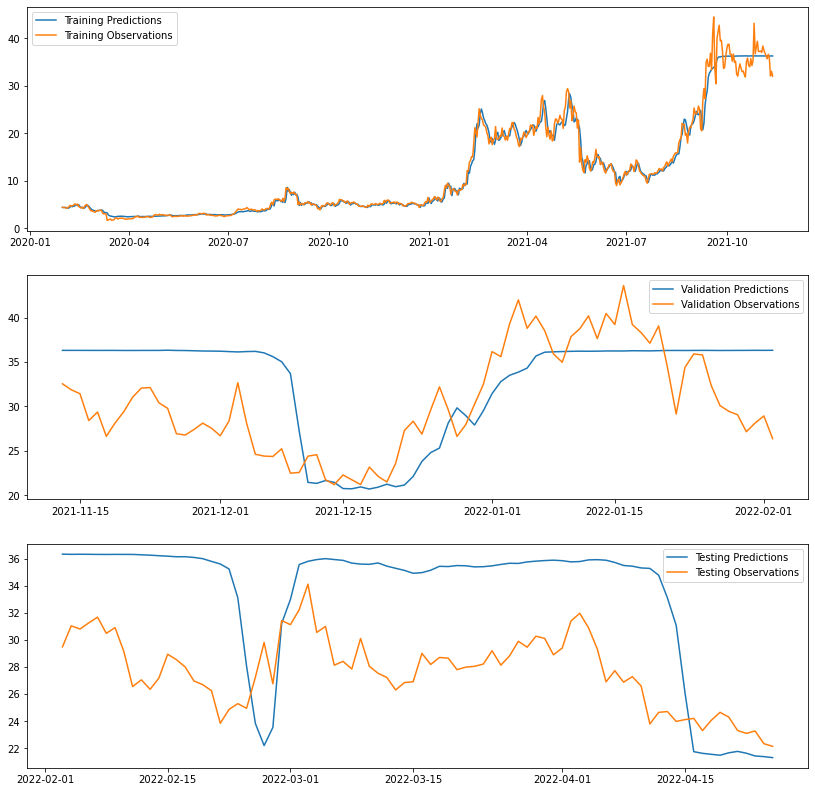

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

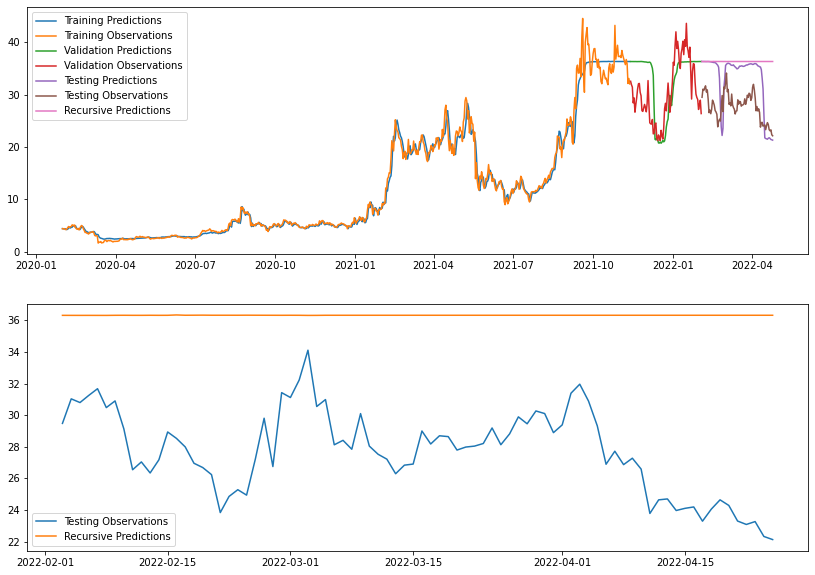

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
              'Training Observations',
              'Validation Predictions', 
              'Validation Observations',
              'Testing Predictions', 
              'Testing Observations',
              'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')